<center><h1>Hands-on Introduction to Sequence-length Requirements in Phylogenetics</h1></center>

<p>Date: September 14, 2018</p>

<p>Author: Sebastien Roch, Department of Mathematics, University of Wisconsin-Madison</p>

# Introduction

Phylogeny estimation is a central problem in evolutionary biology and beyond. In the most basic form of the problem, one has access to aligned homolous DNA sequences, say from a common gene, across multiple species. The goal is to output a phylogeny that describes the underlying evolutionary relationships. A large number of inference methods have been developed for this problem. Often one relies on the assumption that the data fits a stochastic model of sequence evolution on a tree, under which many methods have been proven to be statistically consistent, i.e., as the amount of data increases, the estimated phylogeny converges to the true phylogeny with probability one. 

In order to compare the statistical accuracy of different methods, however, a natural theoretical approach is to analyze the rate at which this convergence occurs. Through a series of analytical computations and numerical simulations, we review some known insights into this fundamental question: how much data is needed to reconstruct the Tree of Life? After some basic definitions, we analyze in detail a simple setting: the three-leaf rooted case under the Cavender-Farris model. Despite its simplicity, this setting already brings to light the important role played by various parameters, in particular the shortest branch length and the depth, in the difficulty of reconstructing phylogenies. We consider both distance-based and likelihood-based methods, as well as some information-theoretic lower bounds. We subsequently extend these observations to larger trees, emphasising the role of a different parameter, the branching rate. Bibliographic information is provided in the last section.

Code is provided in Python. A Jupyter notebook is available at: <a href="https://github.com/sebroc/seq-len/">github.com/sebroc/seq-len/</a>. 

A mathematical introduction to phylogenetics is found at: <a href="http://math.wisc.edu/~roch/evol-gen/">math.wisc.edu/~roch/evol-gen/</a>.

The basic probability results used below are reviewed here: <a href="http://www.math.wisc.edu/~roch/mdp/">math.wisc.edu/~roch/mdp/</a>.

# Definitions

The unknown phylogeny is a tree $T=(V,E)$ whose root $R$ has degree $2$ and whose internal vertices have degree $3$. We let $\mathbf{T}_n$ be the set of such phylogenies with $n$ leaves. 

The sequence data at the leaves $L = \{X_1,\ldots,X_n\}$ is assumed to be generated under the Cavender-Farris (CF) model. 
Formally, given branch lengths $l_e \in \mathbb{R}_+$ for $e\in E$, every site $i = 1,\ldots,k$ is distributed independently according to the following process.
Pick the root state $\sigma_R^i$ uniformly at random in $\mathbf{S} = \{-1,+1\}$.
A substitution occurs independently on edge $e$ with probability 
$$p(l_e) := \frac{1}{2}\left(1-e^{-2l_e}\right).$$
Let $\tau_e^i = -1$ if a substitution occurs on $e$ on site $i$, and let $\tau_e^i = +1$ otherwise.
The state at $U$ on site $i$ is 
$$\sigma_U^i = \sigma_R^i\prod_{e\in P(R,U)}\tau_e^i$$
where $P(R,U)$ is the set of edges on the path from root $R$ to vertex $U$.
While this representation of the CF model may be unfamiliar to the reader, it will make both analytical derivations and numerical computations more straightforward.
Denote by 
$$\sigma_U^{(k)} = (\sigma_U^1,\dots,\sigma_U^k),$$ 
the resulting sequence at $U$ and let $\sigma_L^{(k)} = \{\sigma_X^{(k)}:X\in L\}$ be the set of sequences at the leaves. We write $\sigma_L^{(k)}
\sim (T,l)^{\otimes k}$ for a sequence dataset with $k$ sites generated at the leaves $L$ of $T$ with branch lengths $l = (l_e:e\in E)$.

A phylogenetic reconstruction algorithm is a collection of maps $\{\mathbf{R}_n^k:\mathbf{S}^{L\times [k]} \to \mathbf{T}_n\}$ from sequence datasets of length $k$ on $L$ to phylogenies with $n$ leaves, for all $n,k \in \mathbb{N}$ (where we used the notation $[k] = \{1,\ldots,k\}$). Such an algorithm is
statistically consistent if: for any number of leaves $n$ and any weighted phylogeny on $n$ leaves $(T,l)$,
the probability of correct reconstruction goes to $1$ as the sequence length $k$ goes to $+\infty$, i.e.,
$$
\lim_k \mathbb{P}\left[\mathbf{R}_n^k(\sigma_L^{(k)}) = T\right] = 1,
$$
where $\sigma_L^{(k)} \sim (T,l)^{\otimes k}$.

The sequence-length requirement of a consistent reconstruction algorithm $\mathbf{R} = \{\mathbf{R}_n^k:,n,k \in \mathbb{N}\}$ is a natural way to quantify the convergence rate of the success probability as $k \to +\infty$. Fix $\delta \in (0,1)$. Formally, we define the sequence-length requirement of $\mathbf{R}$ at $(T,l)$ as the smallest integer $K_{\mathbf{R}}(T,l)$ such that 
$$
\mathbb{P}\left[\mathbf{R}_n^k(\sigma_L^{(k)}) = T\right] > 1-\delta,
$$
for all $k \geq K_{\mathbf{R}}(T,l)$, where $\sigma_L^{(k)} \sim (T,l)^{\otimes k}$. The requirement at a given model $(T,l)$ is not particularly meaningful: we can always achieve perfect reconstruction by simply outputting $(T,l)$ on any dataset. We instead consider a class of phylogenetic models $\mathcal{P}$, e.g., all phylogenies with $n$ leaves and branch lengths in some set of allowed values. We will then define the sequence-length requirement over $\mathcal{P}$ as
$$
K_{\mathbf{R}}(\mathcal{P}) 
= \sup_{(T,l) \in \mathcal{P}} K_{\mathbf{R}}(T,l).
$$
Rather than computing $K_{\mathbf{R}}$ explicitly, one typically looks for upper and lower bounds that depend on structural parameters that affect the accuracy of $\mathbf{R}$, namely the size of the tree, its shortest branch length as well as its depth.

# A simple setting

We will mostly focus on the simplest setting: a three-leaf phylogeny under the molecular clock assumption. Despite its simplicity, this setting suffices to illustrate key elementary insights about sequence-length requirements. 

On the set of leaves $L = \{A, B ,C\}$, there are three possible rooted topologies, denoted respectively by $AB|C$, $AC|B$ and $BC|A$, where the first two leaves are "closest." For $T = XY|Z$, let $M$ be the most recent common ancestor of $X$ and $Y$. We denote by $g$ the lengths $l_{XM} = l_{YM}$ and we denote by $f$ the length $l_{MR}$, where $R$ is the root. We further assume that $l_{ZR} = g+f$. Notice that all paths from the root to the leaves have the same length &mdash; this is the so-called molecular clock case. We refer to this model as $XY|Z_{g,f}$ and we write $\sigma_L^{(k)} \sim XY|Z_{g,f}^{\otimes k}$ for a corresponding dataset of length $k$.

We will use numerical simulations (embedded in the text) to illustrate some basic results on sequence-length requirements. Below the function `AB_C` generates `N` sequence datasets of length `k` at the leaves of the tree $T = AB|C$ with parameters `g` and `f`, as defined above. Rather than outputting the sequences themselves, it returns what will turn out to be a more convenient representation: for each pair of leaves $X,Y$, each site $i$ and each sample the quantity
$$
s_{XY}^i = \sigma_X^i \sigma_Y^i,
$$
which is $-1$ if $X$ and $Y$ disagree, and $+1$ otherwise. Note that each assignment of values $s_{AB}^i, s_{AC}^i, s_{BC}^i$ in fact corresponds to two different sites (by flipping all the signs), but this will not be an issue below. To see how these $s_{XY}^i$ values are generated, note that a different but equivalent expression for $s_{XY}^i$ is $s_{MX}^i s_{MY}^i$, where we use the notation $s_{U_1 U_2}^i = \sigma_{U_1}^i \sigma_{U_2}^i$ for any two vertices $U_1, U_2 \in V$. Further, observe that $s_{MA}^i = \tau_{MA}^i$ and $s_{MB}^i = \tau_{MB}^i$ while 
$$
s_{MC}^i = \tau_{RM}^i \tau_{RC}^i,
$$
i.e., there is a substitution between $M$ and $C$ if there is an odd number of substitutions on the path $RM, RC$. The total length of this path is $g+2f$ and, as a result, it can be checked (using the computations later in this section for instance) that the probability that $s_{MC}^i = -1$ is $p(g+2f)$.

In [1]:
from math import exp, sqrt
import numpy as np
np.random.seed(0)

def l2p(l): # branch length to substitution probability
    return (1-exp(-2*l))/2

def sub(p,k,N): # output -1 indicates substitution (o.w. 1)
    return 1 - 2*(np.random.rand(N,k)<p)

def AB_C(g,f,k,N): # generate dataset under AB|C
    sMA, sMB = sub(l2p(g),k,N), sub(l2p(g),k,N)
    sMC = sub(l2p(g+2*f),k,N)
    return sMA*sMB, sMA*sMC, sMB*sMC

The class of reconstruction methods that is perhaps easiest to analyze are the distance-based methods, i.e., loosely speaking those methods based on pairwise sequence comparisons. Let
$$
\Sigma_{XY}^k = \sum_{i=1}^k s_{XY}^i.
$$
Observe that this quantity is positive if and only if $X$ and $Y$ agree on a majority of sites. The uncorrected Cavender-Farris distance formula, i.e., the fraction of differences between the sequences at $X$ and $Y$, is then given by $\frac{1}{2}\left(1 - \frac{1}{k}\Sigma_{XY}^k\right).$ 

To provide some insights into the sequence-length requirements of distance-based methods, we begin with the following intuitive algorithm $\mathbf{D}$ over three-species datasets: we return $\mathbf{D}(\sigma_L^{(k)}) = XY|Z$ if 
$$
\min\left\{\Sigma_{XY}^k - \Sigma_{XZ}^k,\Sigma_{XY}^k - \Sigma_{YZ}^k\right\} > 0;
$$
and we return a failure if no such pair exists. Notice that at most one pair can satisfy this property. In words, we choose the closest pair to be that whose sequences are most similar.

The function `test_pairwise` below implements this method and estimates its accuracy under sequence data of length up to `k` generated under $T = AB|C$ with parameters `g`, `f`. The number of repetitions is `N`. For speed, we re-use the data for sequence length $k'-1$ in the simulation for sequence length $k'$.

In [2]:
def comp(critABvAC,critABvBC): # cumulative comparison across sequences
    return np.cumsum(critABvAC,axis=1), np.cumsum(critABvBC,axis=1)

def test_pairwise(g,f,k,N): # testing D under AB|C 
    sAB, sAC, sBC = AB_C(g,f,k,N)
    ABvAC, ABvBC = comp(sAB-sAC,sAB-sBC)
    return np.sum(np.logical_and(ABvAC>0, ABvBC>0),axis=0)/N

As the next experiment illustrates, the frequency of successful reconstruction by $\mathbf{D}$ increases to $1$ as $k \to +\infty$. That is, the simulation supports (but does not prove) the claim that $\mathbf{D}$ is a consistent reconstruction algorithm in this simple setting. 

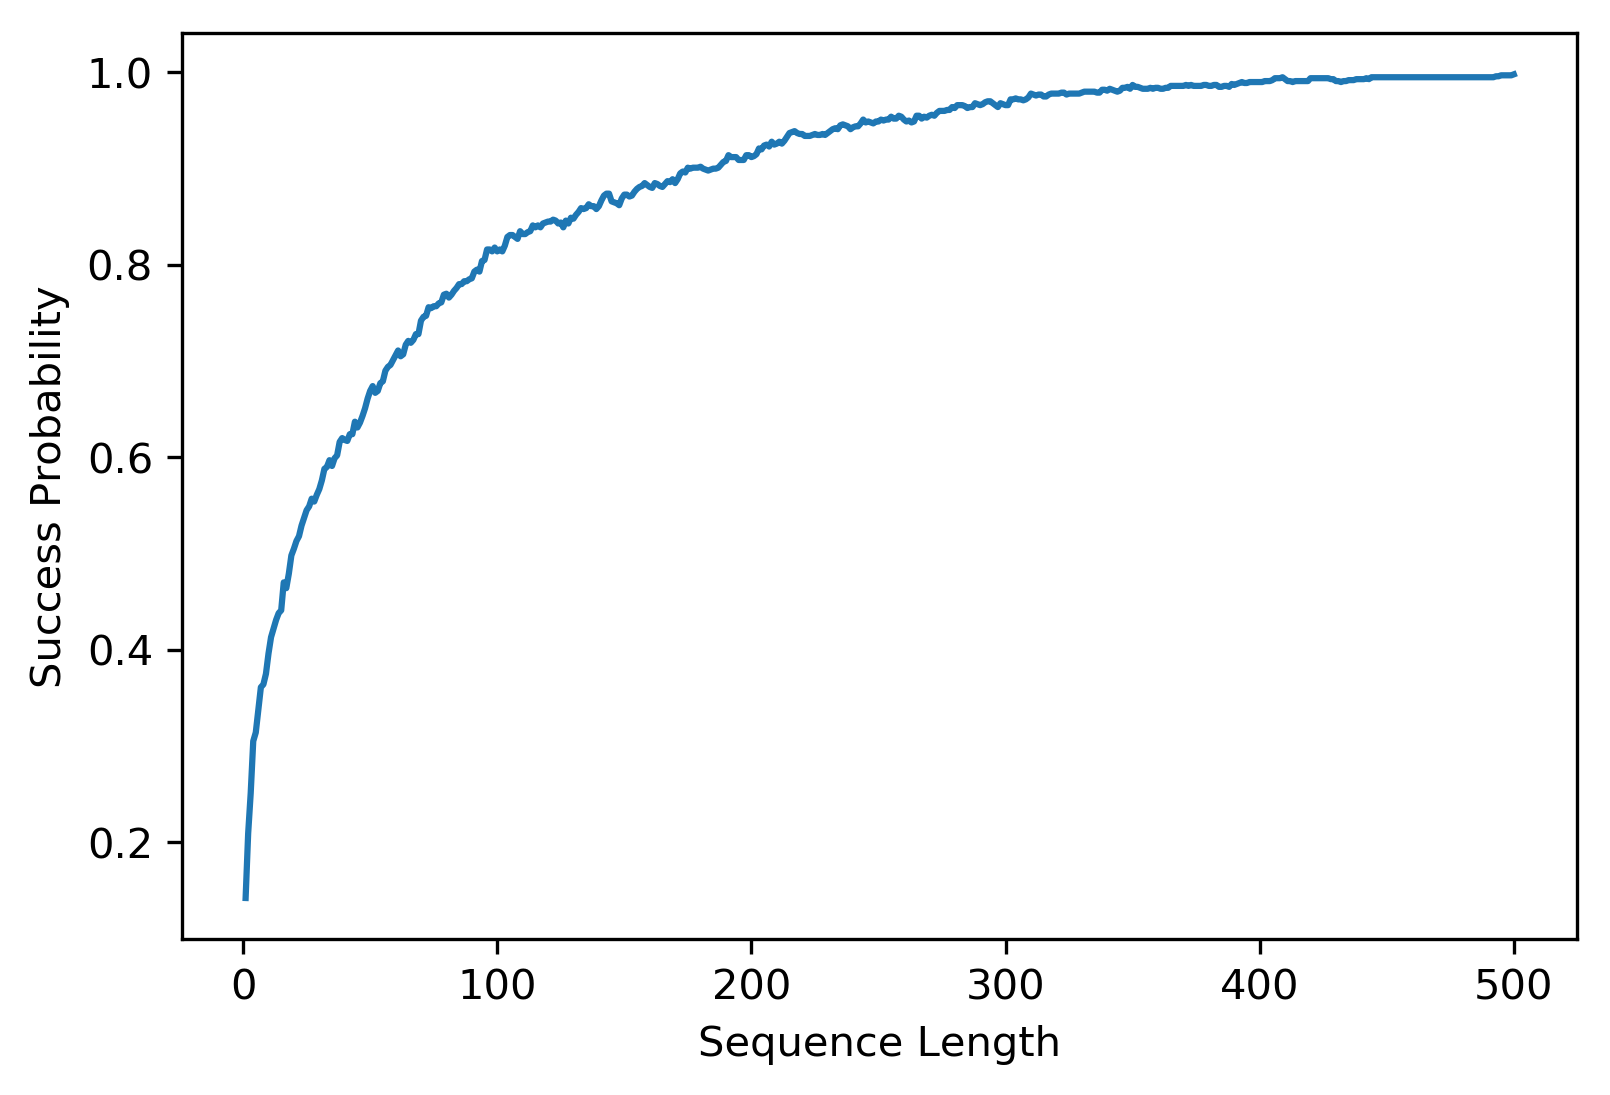

In [3]:
# EXP 1: accuracy of pairwise comparisons v. k
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300 # high-resolution figures

g, f, k, N = 0.1, 0.05, 500, 1000

freq_succ_pw = test_pairwise(g, f, k, N)

plt.plot(np.arange(1,k+1),freq_succ_pw);
plt.xlabel('Sequence Length'), plt.ylabel('Success Probability');

In fact, consistency is straightforward to establish analytically in this case. Indeed,
recall that $s_{AB}^i = s_{MA}^i s_{MB}^i = \tau_{MA}^i \tau_{MB}^i$. Define
$$
\mathbb{E}\left[\tau_{MA}^i\right] = [+1](1-p(g)) + [-1]p(g) = e^{-2g} =: \theta(g).
$$
Because edge substitutions are independent, it follows that
$$
\mathbb{E}\left[s_{AB}^i\right] 
= \mathbb{E}\left[\tau_{MA}^i \tau_{MB}^i\right]
= \theta(g)^2.
$$
Similarly, $\mathbb{E}\left[s_{AC}^i\right] = \theta(g+2f)^2$ and $\mathbb{E}\left[s_{BC}^i\right] = \theta(g+2f)^2$.
Hence, by the law of large numbers, as $k \to +\infty$ it holds that 
$$
\frac{1}{k}\Sigma_{AB}^k \to \theta(g), \quad 
\frac{1}{k}\Sigma_{AC}^k \to \theta(g+2f), \quad
\frac{1}{k}\Sigma_{BC}^k \to \theta(g+2f).
$$
Since $\theta$ is strictly decreasing in its argument, the last observation implies that $\Sigma_{AB}^k$ is eventually larger than both $\Sigma_{AC}^k$ and $\Sigma_{BC}^k$ with probability $1$, establishing consistency.

In the next section, we consider the rate of convergence.

# Phylogenetic signal

As pointed out earlier, two structural parameters that affect the sequence-length requirement of reconstruction algorithms are the shortest branch length and the depth of a phylogeny. We study them in turn in the three-leaf case. We do not compute the sequence-length requirement explicitly &mdash; rather we obtain upper bounds depending on $g$ and $f$. In a subsequent section, we also provide lower bounds.

Let $T= AB|C$, assume that $\sigma_L^{(k)} \sim AB|C_{g,f}^{\otimes k}$ and let $\Sigma_{XY}^k$ be defined as above. For the distance-based method $\mathbf{D}$ to succeed, it must be that events $\mathcal{E}_{AC} = \{\Sigma_{AB}^k - \Sigma_{AC}^k > 0\}$ and $\mathcal{E}_{BC} = \{\Sigma_{AB}^k - \Sigma_{BC}^k > 0\}$ hold simultaneously. To get an upper bound on this probability, we appeal to a standard concentration result, Hoeffding's inequality, which states: if $W_1,\ldots,W_k$ are independent respectively $[\alpha_i,\beta_i]$-valued random variables then for all $\epsilon > 0$
$$
\mathbb{P}\left[\sum_{i=1}^k (W_i - \mathbb{E}[W_i]) \geq k \epsilon\right]
\leq \exp\left(-\frac{2 k^2 \epsilon^2}{\sum_{i=1}^k(\beta_i - \alpha_i)^2}\right).
$$
Hence, re-writing
$$
\mathbb{P}\left[\mathcal{E}_{AC}^c\right]
= \mathbb{P}\left[\sum_{i=1}^k \left(s_{AC}^i - \theta(g+f) - s_{AB}^i + \theta(g)\right) \geq k\left(\theta(g) - \theta(g+2f)\right)\right],
$$
and applying Hoeffding's inequality, we obtain 
$$
\mathbb{P}\left[\mathcal{E}_{AC}^c\right]
\leq \exp\left(-\frac{2 k^2 \left[\theta(g) - \theta(g+2f)\right]^2}{k(2)^2}\right)
= \exp\left(-\frac{k}{2}\left[\theta(g) - \theta(g+2f)\right]^2\right).
$$
By a union bound,
$$
\mathbb{P}\left[\mathbf{D}(\sigma_L^{(k)}) = T\right]
= 1 - \mathbb{P}\left[\mathcal{E}_{AC}^c \cup \mathcal{E}_{BC}^c\right]
\geq 1 - 2 \exp\left(-\frac{k}{2}\left[\theta(g) - \theta(g+2f)\right]^2\right).
$$
Observe that
$$
\theta(g) - \theta(g+2f)
= e^{-2g} \left(1 - e^{-4f}\right),
$$
so that if
$$
k \geq \bar{\kappa}_{\mathbf{D}}(g,f) := \frac{2 \ln (2/\delta)}{e^{-4g} \left(1 - e^{-4f}\right)^2},
$$
then $\mathbf{D}$ succeeds with probability greater than $1-\delta$. That is, the sequence-length requirement of $\mathbf{D}$ at $AB|C_{g,f}$ is smaller than $\bar{\kappa}_{\mathbf{D}}(g,f)$. 

This bound extends to a much larger class of phylogenetic models. Let 
$$
\mathcal{P} = \bigcup_{g'\leq g, f' \geq f}\{AB|C_{g',f'}, AC|B_{g',f'}, BC|A_{g',f'}\}.
$$
By symmetry over the topologies and by the monotonicity of $\bar{\kappa}_{\mathbf{D}}(g,f)$ in $g$ and $f$, we have the following upper bound on the sequence-length requirement of $\mathbf{D}$ over $\mathcal{P}$
$$
K_{\mathbf{D}}(\mathcal{P}) 
\leq \frac{2 \ln (2/\delta)}{e^{-4g} \left(1 - e^{-4f}\right)^2}.
$$

## Short branches

When fixing $\delta, g$ and taking $f \to 0$, a Taylor expansion of the denominator shows that $\bar{\kappa}_{\mathbf{D}}(g,f)$ scales like $\propto f^{-2}$. The next experiment illustrates this point. Here, under $T = AB|C$ for a fixed value of $g$ and an array `f_arr` of values of $f$, the smallest sequence length to achieve the `target` value for $1-\delta$ is identified. That produces an empirical estimate of $K_{\mathbf{D}}(AB|C_{g,f})$. In a plot of $\log K_{\mathbf{D}}$ v. $\log f$, the slope can be seen to be somewhat close to $-2$, the theoretical prediction.

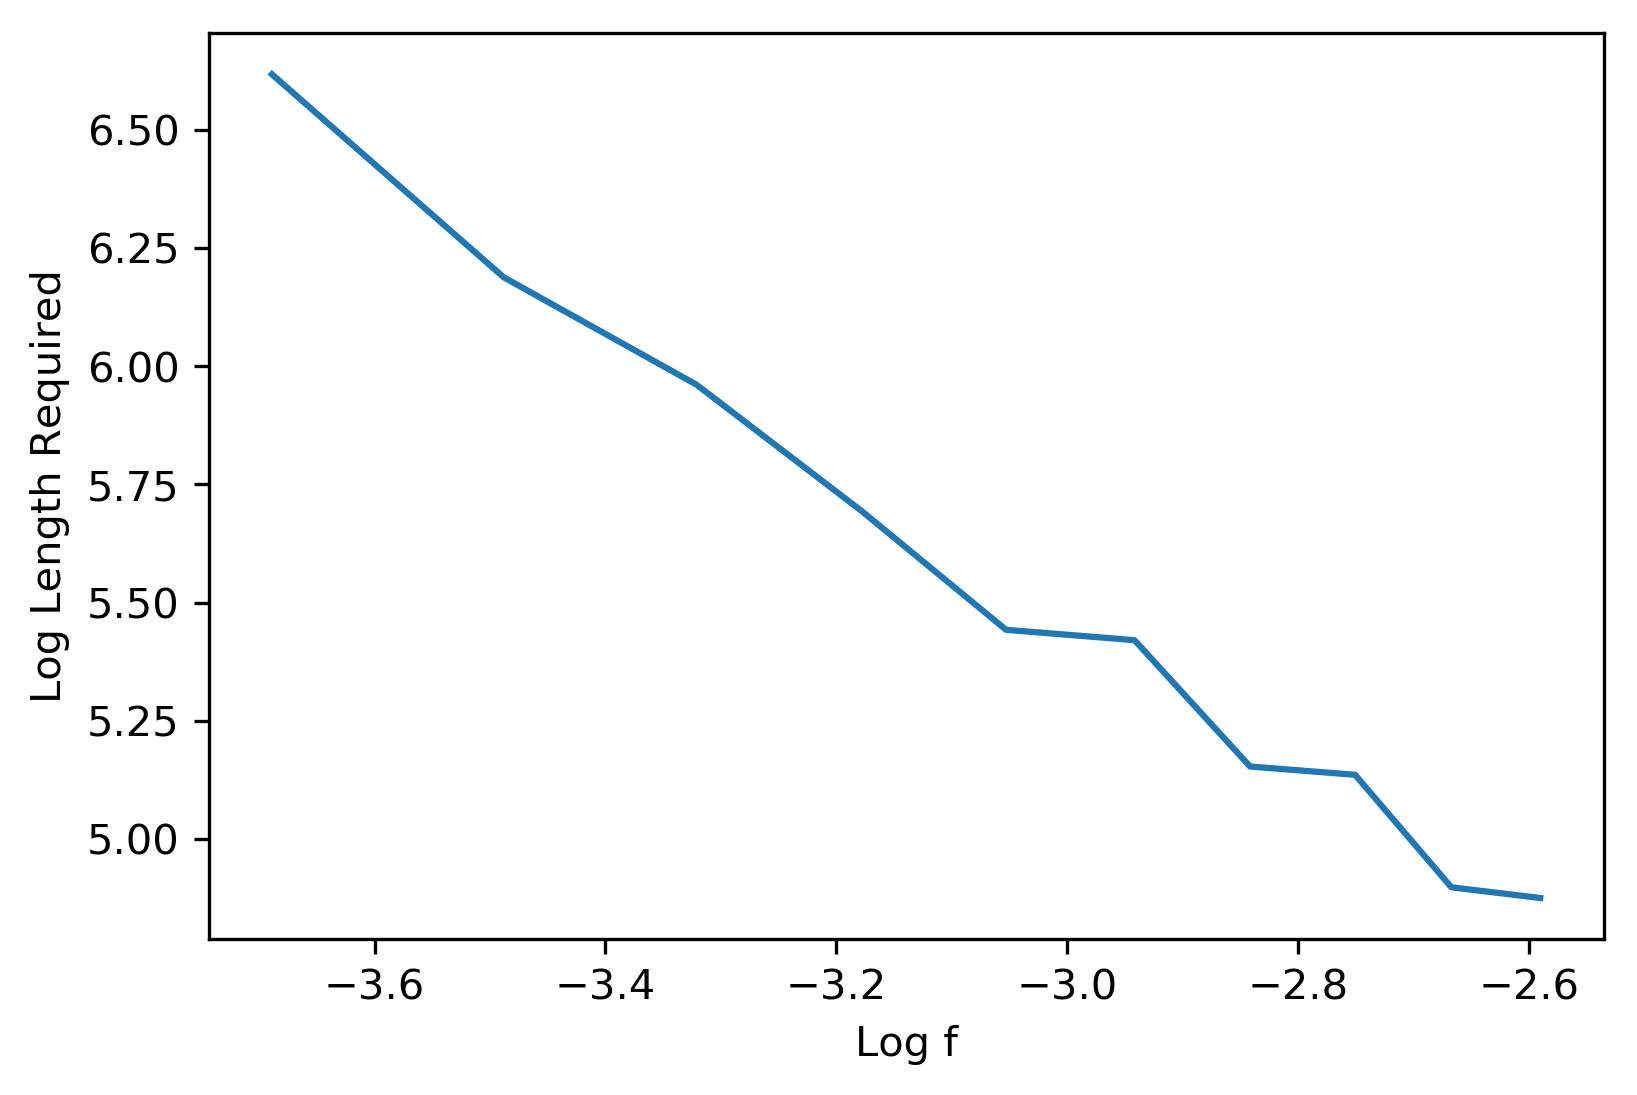

In [4]:
# EXP 2: requirement for pairwise comparisons v. f
g, k, N, target = 0.1, 1500, 1000, 0.95
f_arr_min, f_arr_max, f_arr_len = 0.025, 0.075, 10
f_arr = np.linspace(f_arr_min, f_arr_max, num=f_arr_len)

k_thres_f = np.zeros(f_arr_len)
for i in range(f_arr_len):
    freq_succ = test_pairwise(g, f_arr[i], k, N)
    k_thres_f[i] = np.min(np.nonzero(freq_succ>target))
    
plt.plot(np.log(f_arr), np.log(k_thres_f));
plt.xlabel('Log f'), plt.ylabel('Log Length Required');

## Depth

Similarly, fixing $\delta, f$ in the previous expression gives that $\bar{\kappa}_{\mathbf{D}}(g,f)$ scales like $\propto e^{4g}$. The next experiment illustrates this point. Here, for an array `g_arr` of values of $g$, the smallest sequence length to achieve the `target` value for $1-\delta$ is identified. In a plot of $\log K_{\mathbf{D}}$ v. $g$, we observe a roughly linear relationship, as expected.

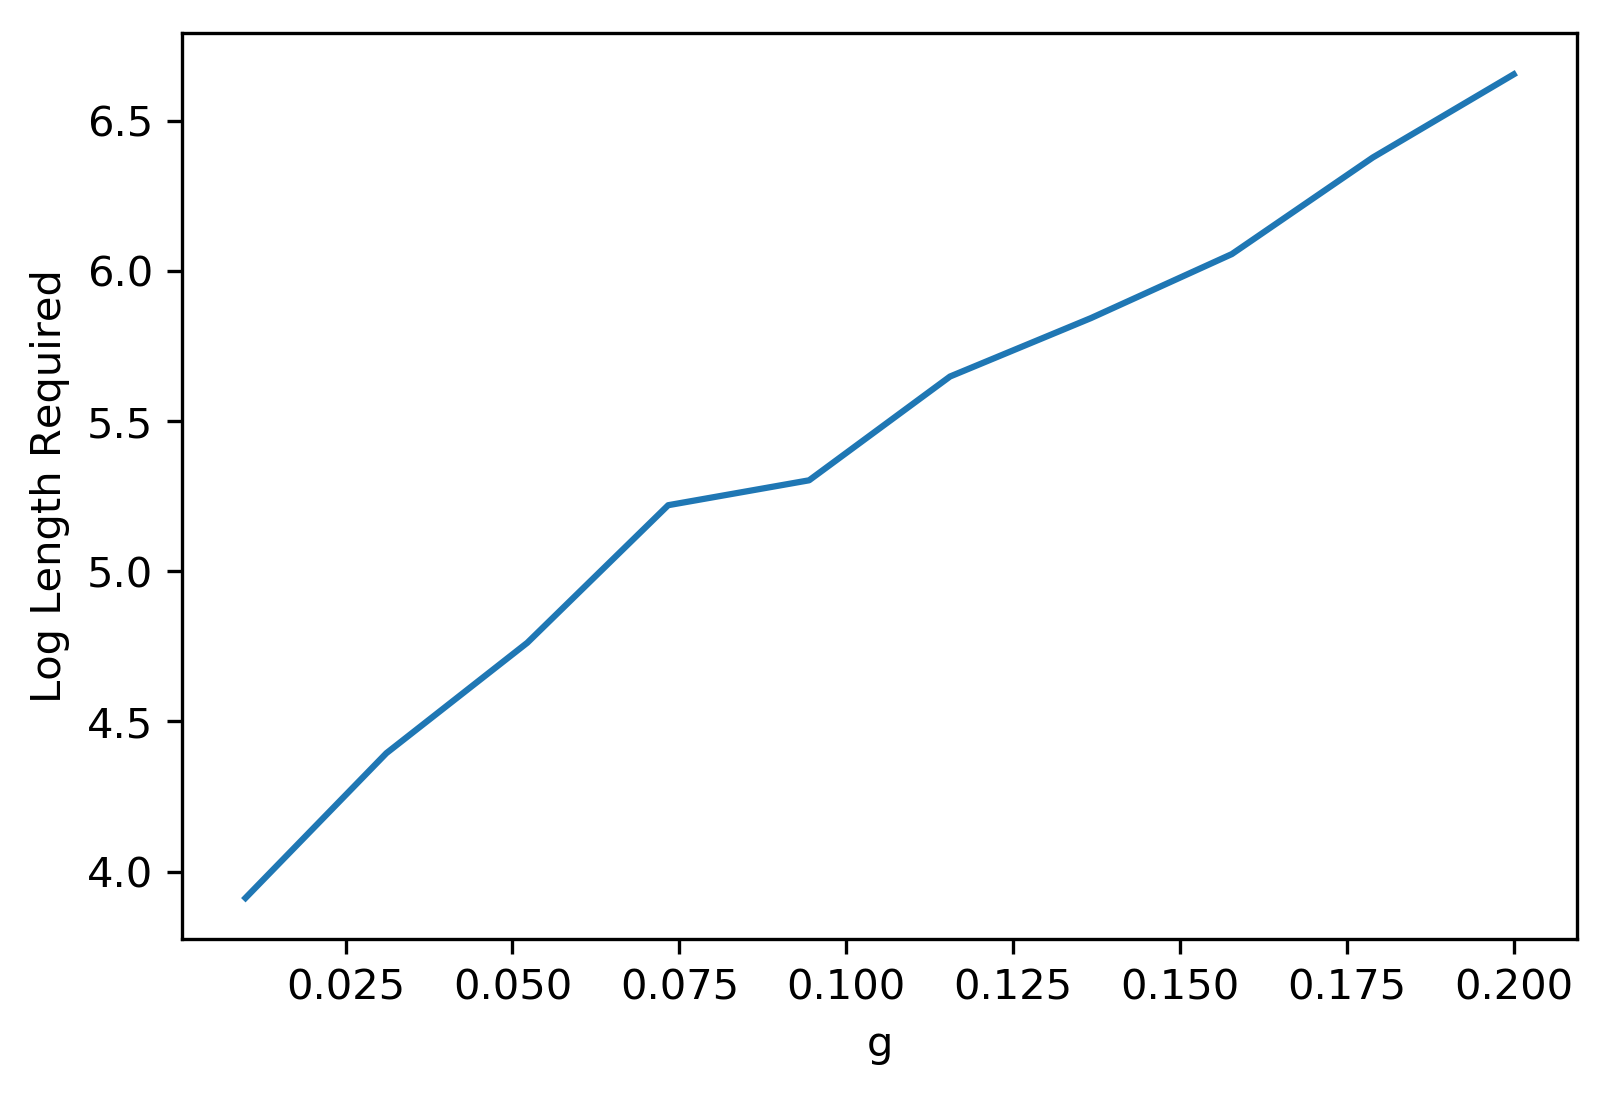

In [5]:
# EXP 3: requirement for pairwise comparisons v. g
f, k, N = 0.05, 1500, 1000
g_arr_min, g_arr_max, g_arr_len, target = 0.01, 0.2, 10, 0.95
g_arr = np.linspace(g_arr_min, g_arr_max, num=g_arr_len)

k_thres_g = np.zeros(g_arr_len)
for i in range(g_arr_len):
    freq_succ = test_pairwise(g_arr[i], f, k, N)
    k_thres_g[i] = np.min(np.nonzero(freq_succ>target))

plt.plot(g_arr, np.log(k_thres_g));
plt.xlabel('g'), plt.ylabel('Log Length Required');

# Not all reconstruction methods are created equal

Sequence-length requirements are useful to compare reconstruction methods: by definition, a higher requirement indicates more data is needed to achieve the same accuracy. We give a simple (albeit artificial) example.  

Consider the following modification of the distance-based method $\mathbf{D}$. Assuming $k$ is even. Define
$$
\Pi_{XY\mathrm{v}XZ}^k = \sum_{\substack{i=1\\\text{$i$ odd}}}^k (s_{XY}^i-s_{XZ}^i)(s_{XY}^{i+1}-s_{XZ}^{i+1}),
$$
and
$$
\Pi_{XY\mathrm{v}YZ}^k = \sum_{\substack{i=1\\\text{$i$ odd}}}^k (s_{XY}^i-s_{YZ}^i)(s_{XY}^{i+1}-s_{YZ}^{i+1}).
$$
The reconstruction algorithm $\mathbf{D}^2$ then proceeds as follows: we return $\mathbf{D}^{2}(\sigma_L^{(k)}) = XY|Z$ if 
$$
\min\left\{\Pi_{XY\mathrm{v}XZ}^k,\Pi_{XY\mathrm{v}YZ}^k\right\} > \eta_{g,f} := \frac{1}{2} e^{-4g} \left(1 - e^{-4f}\right)^2;
$$
and we return a failure if no such pair exists or if more than one pair satisfies this property. Note that this reconstruction algorithm requires knowledge of (or bounds on) $g$ and $f$.

To see that $\mathbf{D}^2$ is consistent, let again $T= AB|C$ and $\sigma_L^{(k)} \sim AB|C_{g,f}^{\otimes k}$. Notice that, by independence of the odd and even sites, it holds that for $i$ odd
$$
\mathbb{E}\left[(s_{AB}^i-s_{AC}^i)(s_{AB}^{i+1}-s_{AC}^{i+1})\right]
= \mathbb{E}\left[s_{AB}^i-s_{AC}^i\right]\mathbb{E}\left[s_{AB}^{i+1}-s_{AC}^{i+1}\right]
= \left[\theta(g)-\theta(g+2f)\right]^2.
$$
Similarly
$$
\mathbb{E}\left[(s_{AB}^i-s_{BC}^i)(s_{AB}^{i+1}-s_{BC}^{i+1})\right]
= \left[\theta(g)-\theta(g+2f)\right]^2,
$$
and
$$
\mathbb{E}\left[(s_{AC}^i-s_{BC}^i)(s_{AC}^{i+1}-s_{BC}^{i+1})\right]
= 0.
$$
By the law of large numbers, we obtain
$$
\frac{2}{k}\Pi_{AC\mathrm{v}AB}^k
= \frac{2}{k}\Pi_{AB\mathrm{v}AC}^k
\to \left[\theta(g)-\theta(g+2f)\right]^2,
$$
and
$$
\frac{2}{k}\Pi_{BC\mathrm{v}AB}^k
= \frac{2}{k}\Pi_{AB\mathrm{v}BC}^k
\to \left[\theta(g)-\theta(g+2f)\right]^2,
$$
while
$$
\frac{2}{k}\Pi_{BC\mathrm{v}AC}^k
= \frac{2}{k}\Pi_{AC\mathrm{v}BC}^k
\to 0.
$$
Since 
$$
\left[\theta(g)-\theta(g+2f)\right]^2 > \frac{1}{2} e^{-4g} \left(1 - e^{-4f}\right)^2 > 0,
$$ 
that establishes consistency.

We now derive an upper bound on the sequence-length requirement of $\mathbf{D}^2$. 
Consider the events 
$$
\mathcal{E}_{AB\mathrm{v}AC} 
= \left\{\Pi_{AB\mathrm{v}AC}^k > \eta_{g,f}\right\},
\quad
\mathcal{E}_{AB\mathrm{v}BC} 
= \left\{\Pi_{AB\mathrm{v}BC}^k > \eta_{g,f}\right\},
\quad
\mathcal{E}_{AC\mathrm{v}BC} 
\left\{\Pi_{AC\mathrm{v}BC}^k < \eta_{g,f}\right\}.
$$
The event $\mathcal{E}_{AB\mathrm{v}AC} \cup \mathcal{E}_{AB\mathrm{v}BC} \cup \mathcal{E}_{AC\mathrm{v}BC}$ implies that the output of $\mathbf{D}^2$ is correct. 
Re-writing
$$
\mathbb{P}\left[
\mathcal{E}_{AB\mathrm{v}AC}^c
\right]
= \mathbb{P}\left[
\Pi_{AB\mathrm{v}AC}^k  - \mathbb{E}\left[\Pi_{AB\mathrm{v}AC}^k\right] \leq - \frac{1}{2} e^{-4g} \left(1 - e^{-4f}\right)^2
\right],
$$
and, applying Hoeffding's inequality, we get the upper bound
$$
\mathbb{P}\left[
\mathcal{E}_{AB\mathrm{v}AC}^c
\right]
\leq \exp\left(-\frac{2 (k/2)^2 \left[\frac{1}{2} e^{-4g} \left(1 - e^{-4f}\right)^2\right]^2}{k/2 \times (2)^2}\right),
$$
and similarly for the events $\mathcal{E}_{AB\mathrm{v}BC}^c$, $\mathcal{E}_{AC\mathrm{v}BC}^c$. By a union bound,
$$
\mathbb{P}\left[\mathbf{D}^2(\sigma_L^{(k)}) = T\right]
\geq 1 - 3 \exp\left(-\frac{k}{16} e^{-8g} \left(1 - e^{-4f}\right)^4\right).
$$
So if
$$
k \geq \bar{\kappa}_{\mathbf{D}^2}(g,f) := \frac{16 \ln (3/\delta)}{e^{-8g} \left(1 - e^{-4f}\right)^4},
$$
then $\mathbf{D}^2$ succeeds with probability greater than $1-\delta$. That is, the sequence-length requirement of $\mathbf{D}^2$ at $AB|C_{g,f}$ is at most $\bar{\kappa}_{\mathbf{D}^2}(g,f)$.

Now, notice that as $f \to 0$ (leaving $g$ and $\delta$ fixed), we have the asymptotic behavior $\bar{\kappa}_{\mathbf{D}^2}(g,f) \propto f^{-4}$, which is worse than what we obtained for $\mathbf{D}$. In words, this bound suggests that $\mathbf{D}^2$ requires significantly more data than $\mathbf{D}$ to achieve the same accuracy: if we divide $f$ by $2$ for instance, $\mathbf{D}$ requires roughly four times as much data, while $\mathbf{D}^2$ requires $16$ times as much. This is only an upper bound of course. We use a numerical simulation to test the theoretical prediction. The following function `test_two_site` implements $\mathbf{D}^2$ on $T=AB|C$ with parameters `g` and `f`, and tests it `N` times across sequences of length up to `k`.  

In [6]:
def test_two_site(g, f, k, N): # testing D^2 under AB|C
    sABo, sACo, sBCo = AB_C(g,f,k//2,N)
    sABe, sACe, sBCe = AB_C(g,f,k//2,N)
    ABvAC, ABvBC = comp((sABo-sACo)*(sABe-sACe),(sABo-sACo)*(sABe-sACe))
    eta = (1/2)*exp(-4*g)*(1-exp(-4*f))**2
    return np.sum(np.logical_and(ABvAC>eta, ABvBC>eta),axis=0)/N

The following experiment is consistent with our bounds on the sequence-length requirements of $\mathbf{D}$ and $\mathbf{D}^2$. Below, a plot of $\log K_{\mathbf{D}^2}$ v. $\log f$ (solid line), shows a roughly linear behavior with slope close to $-4$. A plot of $\log K_{\mathbf{D}}$ v. $\log f$ (dotted line) is also reproduced for comparison. 

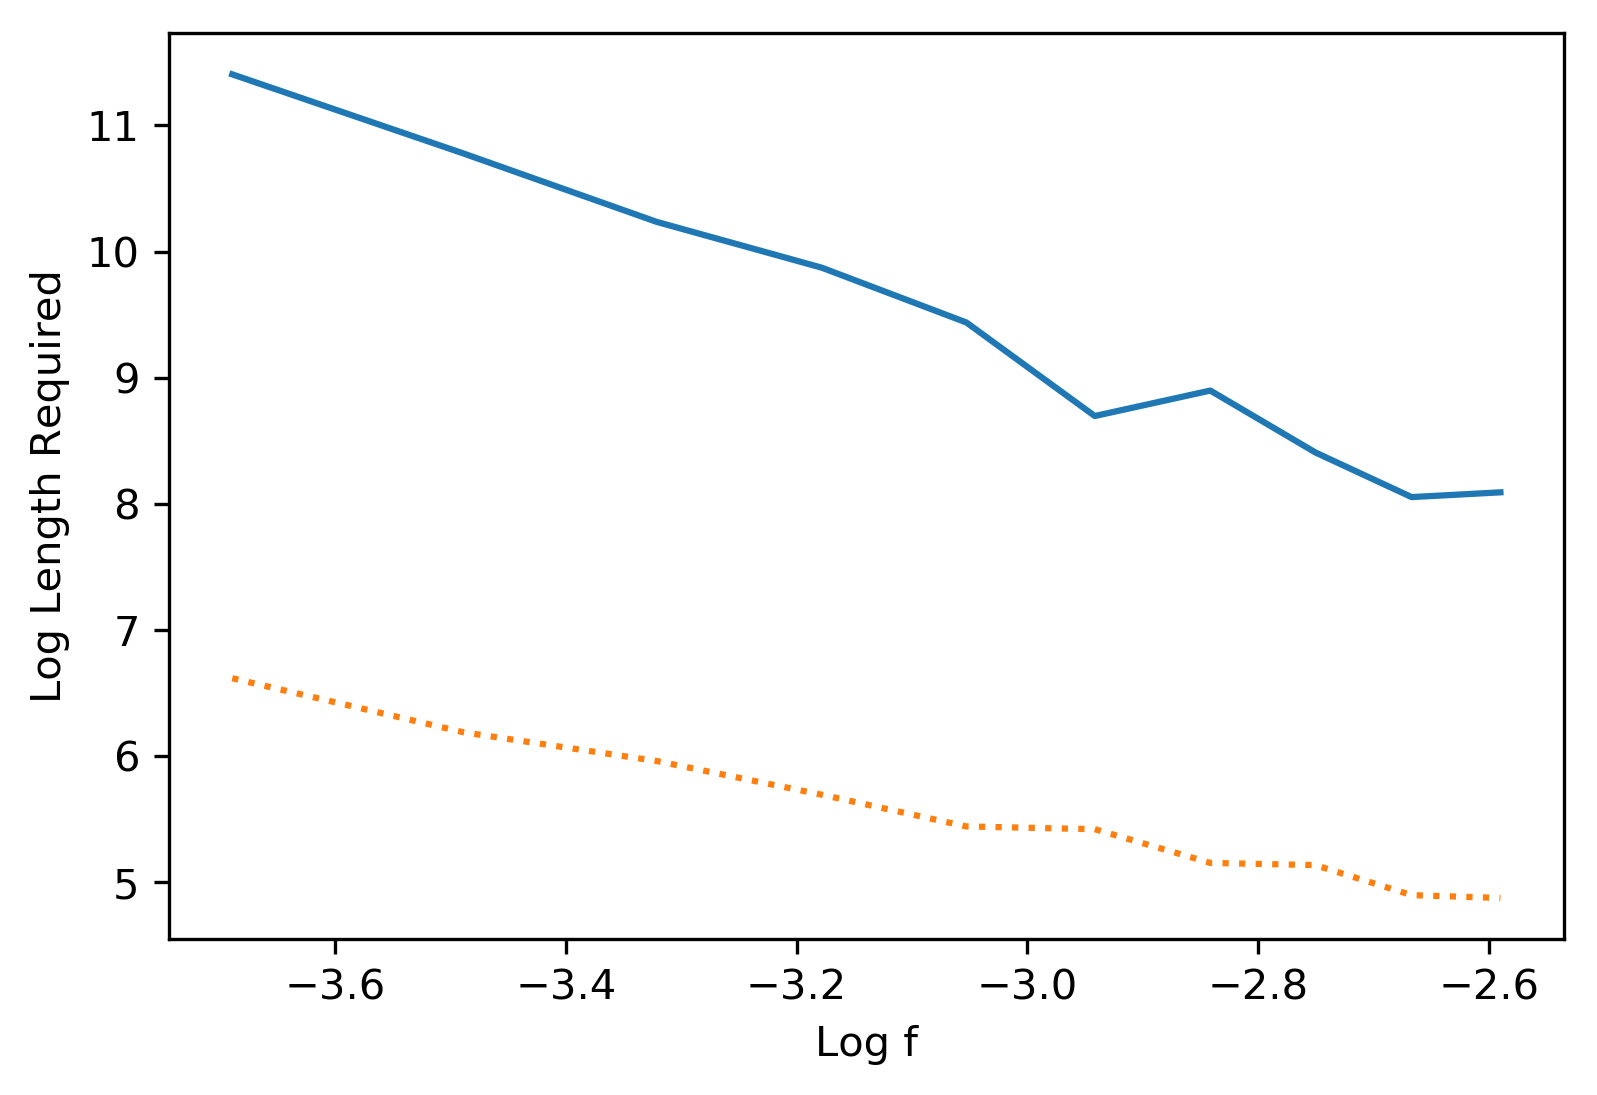

In [7]:
# EXP 4: D^2 has requirement f^-4 (takes a minute or two)
g, f, k, N = 0.1, 0.05, 240000, 200

k_thres_f2 = np.zeros(f_arr_len)
for i in range(f_arr_len):
    freq_succ = test_two_site(g, f_arr[i], k, N)
    k_thres_f2[i] = np.min(np.nonzero(freq_succ>target))
        
plt.plot(np.log(f_arr),np.log(k_thres_f2));
plt.plot(np.log(f_arr),np.log(k_thres_f),':');
plt.xlabel('Log f'), plt.ylabel('Log Length Required');

# What about maximum likelihood estimation?

So far, we have analyzed pairwise comparison methods. Another common approach in practice is maximum likelihood estimation (MLE), which takes into account the full empirical distribution at the leaves. In the three-leaf case considered previously, the MLE is defined as follows
$$
\mathbf{L}(\sigma_L^{(k)})
= \mathrm{argmax}\left\{
\sup_{g_0,f_0} \log \mathcal{L}^k(\sigma_L^{(k)};T_0,g_0,f_0)
:
T_0 \in \{AB|C,AC|B,BC|A\}
\right\},
$$
where $\mathcal{L}^k(\sigma_L^{(k)};T_0,g_0,f_0)$ is the likelihood, i.e., the probability of observing the data $\sigma_L^{(k)}$ under the tree $T_0$ with parameters $g_0,f_0$. For simplicity, if more than one tree achieves the maximum, we return a failure. How does the sequence-length requirement of $\mathbf{L}$ compare to that of $\mathbf{D}$?

To study this question, we note first that in this case the log-likelihood takes a simple analytical form. Let $T_0 = XY|Z$ with parameters $g_0$ and $f_0$, and let $M$ be the most recent common ancestor of $X$ and $Y$. By independence of the sites, the probability of observing $\sigma_L^{(k)}$ is the product of the probabilities of observing the $\sigma_L^i$'s, which after taking a logarithm becomes a sum
$$
\log \mathcal{L}^k(\sigma_L^{(k)};T_0,g_0,f_0)
= \sum_{i=1}^k \log \mathcal{L}^1(\sigma_L^{i};T_0,g_0,f_0).
$$
Let $p_0 = p(g_0)$ and $q_0 = p(g_0+2f_0)$, and define
$$
I^i_{XY} = \frac{1+s_{XY}^i}{2}, \qquad I^i_{XZ} = \frac{1+s_{XZ}^i}{2},
$$
i.e., $I^i_{XY} = 1$ if $X$ and $Y$ agree on site $i$, and $I^i_{XY} = 0$ otherwise. In terms of $I^i_{XY}$ and $I^i_{XZ}$ (which are functions of the data $\sigma_L^i$),
the log-likelihood is
$$
\log \mathcal{L}^1(\sigma_L^{i};T_0,g_0,f_0)
= \log\left(\frac{1}{2}\Lambda_1 + \frac{1}{2}\Lambda_2\right),
$$
where
$$
\Lambda_1
= (1-p_0)(1-p_0)^{I^i_{XY}} p_0^{1-I^i_{XY}} (1-q_0)^{I^i_{XZ}} q_0^{1-I^i_{XZ}},
$$
and
$$
\Lambda_2
= p_0 (1-p_0)^{1-I^i_{XY}} p_0^{I^i_{XY}}(1-q_0)^{1-I^i_{XZ}} q_0^{I^i_{XZ}}.
$$
The above expression is obtained by considering whether or not there is a substitution along the edge $XM$, followed by whether or not there are substitutions along edge $MY$ and path $MR, RZ$. Note that all these substitutions are independent.

## Likelihood ratio test

Analyzing the behavior of $\mathbf{L}$ is somewhat complicated by the need to optimize over the nuisance parameters $g$ and $f$. To get some insight, it is easier to start by assuming that $g$ and $f$ are known and that the true topology is either $AB|C$ or $AC|B$. That is, we consider the class of phylogenetic models $\mathcal{P} = \{AB|C_{g,f},AC|B_{g,f}\}$. Then the MLE is obtained by identifying the topology among these two with largest log-likelihood. To simplify the notation, define
$$
\mathcal{L}_{XY}^k(\sigma_L^{(k)}) = \mathcal{L}^k(\sigma_L^{(k)};XY|Z,g,f).
$$
Consider the following modification $\mathbf{L}'$ of $\mathbf{L}$: we return $AB|C$ if $\log\mathcal{L}_{AB}^k(\sigma_L^{(k)}) > \log\mathcal{L}_{AC}^k(\sigma_L^{(k)})$;
$AC|B$ if $\log\mathcal{L}_{AC}^k(\sigma_L^{(k)}) > \log\mathcal{L}_{AB}^k(\sigma_L^{(k)})$;
or otherwise we choose uniformly at random between the two. This is also known as a likelihood ratio test (LRT).

While we could use Hoeffding's inequality again to analyze the sequence-length requirement of $\mathbf{L}'$, we will introduce instead a comparison argument to distance-based methods that generalizes more easily to larger, more complex phylogenies. The comparison works as follows. Let $\Psi$ be an arbitrary randomized test for deciding whether sequence data $\sigma_L^{(k)}$ was generated by $AB|C_{g,f}$ or $AC|B_{g,f}$, i.e., for each $\sigma_L^{(k)} \in S^{L\times [k]}$, $\Psi(\sigma_L^{(k)})$ is a $\{AB|C, AC|B\}$-valued random variable. The sum of so-called Type I and Type II errors is defined as
$$
\mathcal{W}_{I,II}[\Psi]
= \mathcal{W}_{E,AB}[\Psi]
+ \mathcal{W}_{E,AC}[\Psi],
$$
where $\mathcal{W}_{E,AB}[\Psi]$ is the probability of error under $AB|C_{g,f}$
$$
\mathcal{W}_{E,AB}[\Psi]
= \sum_{\sigma_L^{(k)}} \mathcal{L}_{AB}^k(\sigma_L^{(k)}) (1-\mathbb{P}[\Psi(\sigma_L^{(k)})=AB|C]),
$$
and, similarly, $\mathcal{W}_{E,AC}[\Psi]$ is the probability of errror if the data had been generated instead under $AC|B_{g,f}$
$$
\mathcal{W}_{E,AC}[\Psi]
= \sum_{\sigma_L^{(k)}} \mathcal{L}_{AC}^k(\sigma_L^{(k)}) \mathbb{P}[\Psi(\sigma_L^{(k)})=AB|C].
$$
It is a standard fact of statistical theory that $\mathcal{W}_{I,II}[\Psi]$ is minimized by $\Psi = \mathbf{L}'$ (as can easily be derived by inspecting the expression for $\mathcal{W}_{I,II}$). 

We use this fact to get a bound on the probability of error of $\mathbf{L}'$. We will need a simple observation first. Notice that, by symmetry, for $\Psi = \mathbf{L}'$ we have $\mathcal{W}_{E,AB}[\Psi] = \mathcal{W}_{E,AC}[\Psi]$.
Hence
$$
\mathbb{P}[\mathbf{L}'(\sigma_L^{(k)}) \neq AB|C]
= \frac{1}{2}\mathcal{W}_{I,II}[\mathbf{L}']
\leq \frac{1}{2}\mathcal{W}_{I,II}[\Psi],
$$
for any $\Psi$. Now choose $\Psi$ to be the following modification $\mathbf{D}'$ of $\mathbf{D}$: we return $AB|C$ if $\Sigma_{AB}^k > \Sigma_{AC}^k$;
$AC|B$ if $\Sigma_{AC}^k > \Sigma_{AB}^k$;
or otherwise we choose uniformly at random between the two. Because the symmetry argument above holds for $\mathbf{D}'$ as well, we finally get
$$
\mathbb{P}[\mathbf{L}'(\sigma_L^{(k)}) \neq AB|C] 
\leq \mathbb{P}[\mathbf{D}'(\sigma_L^{(k)}) \neq AB|C].
$$
In words, the probability of failure of $\mathbf{L}'$ is at most that of $\mathbf{D}'$. We have already shown that the right-hand side is $\leq \exp\left(-\frac{k}{2}\left[\theta(g) - \theta(g+2f)\right]^2\right)$, which is less than $\delta$ if 
$$
k \geq \frac{2 \ln (1/\delta)}{e^{-4g} \left(1 - e^{-4f}\right)^2}.
$$
In essence, this argument implies that over this restricted class $\mathcal{P}$ the sequence-length requirement of the MLE is at most that of the distance-based method.

We further explore this prediction in a simulation. The function `test_lrt` below is in fact more general than the LRT described above (in order to obtain a fair comparison to `test_pairwise`), as it compares the log-likelihood of all three topologies $AB|C$, $AC|B$ and $BC|A$ for fixed parameters `g` and `f`. It tests how often the log-likelihood of $AB|C$ is strictly larger than that of the other two.

In [8]:
def s2i(s): # converts {-1,+1} to {0,1}
    return (1+s)//2

def llXY_Z(g,f,sXY,sXZ): # log-likelihood under XY|Z
    p, q, iXY, iXZ = l2p(g), l2p(g+2*f), s2i(sXY), s2i(sXZ)
    Lbda1 = (1-p)*((1-p)**iXY)*(p**(1-iXY))*((1-q)**iXZ)*(q**(1-iXZ))
    Lbda2 = p*((1-p)**(1-iXY))*(p**iXY)*((1-q)**(1-iXZ))*(q**iXZ)
    return np.log((1/2)*Lbda1+(1/2)*Lbda2)

def test_lrt(g,f,g0,f0,k,N): # testing LRT under AB|C 
    sAB, sAC, sBC = AB_C(g,f,k,N)
    llAB = llXY_Z(g,f,sAB,sAC)
    llAC, llBC = llXY_Z(g0,f0,sAC,sAB), llXY_Z(g0,f0,sBC,sAB)
    ABvAC, ABvBC = comp(llAB-llAC,llAB-llBC)
    return np.sum(np.logical_and(ABvAC>0, ABvBC>0),axis=0)/N

The following experiment indicates that the probabilities of success of the basic likelihood-based (solid line) and distance-based (dotted line) methods are very similar in this setting for all sequence lengths. 

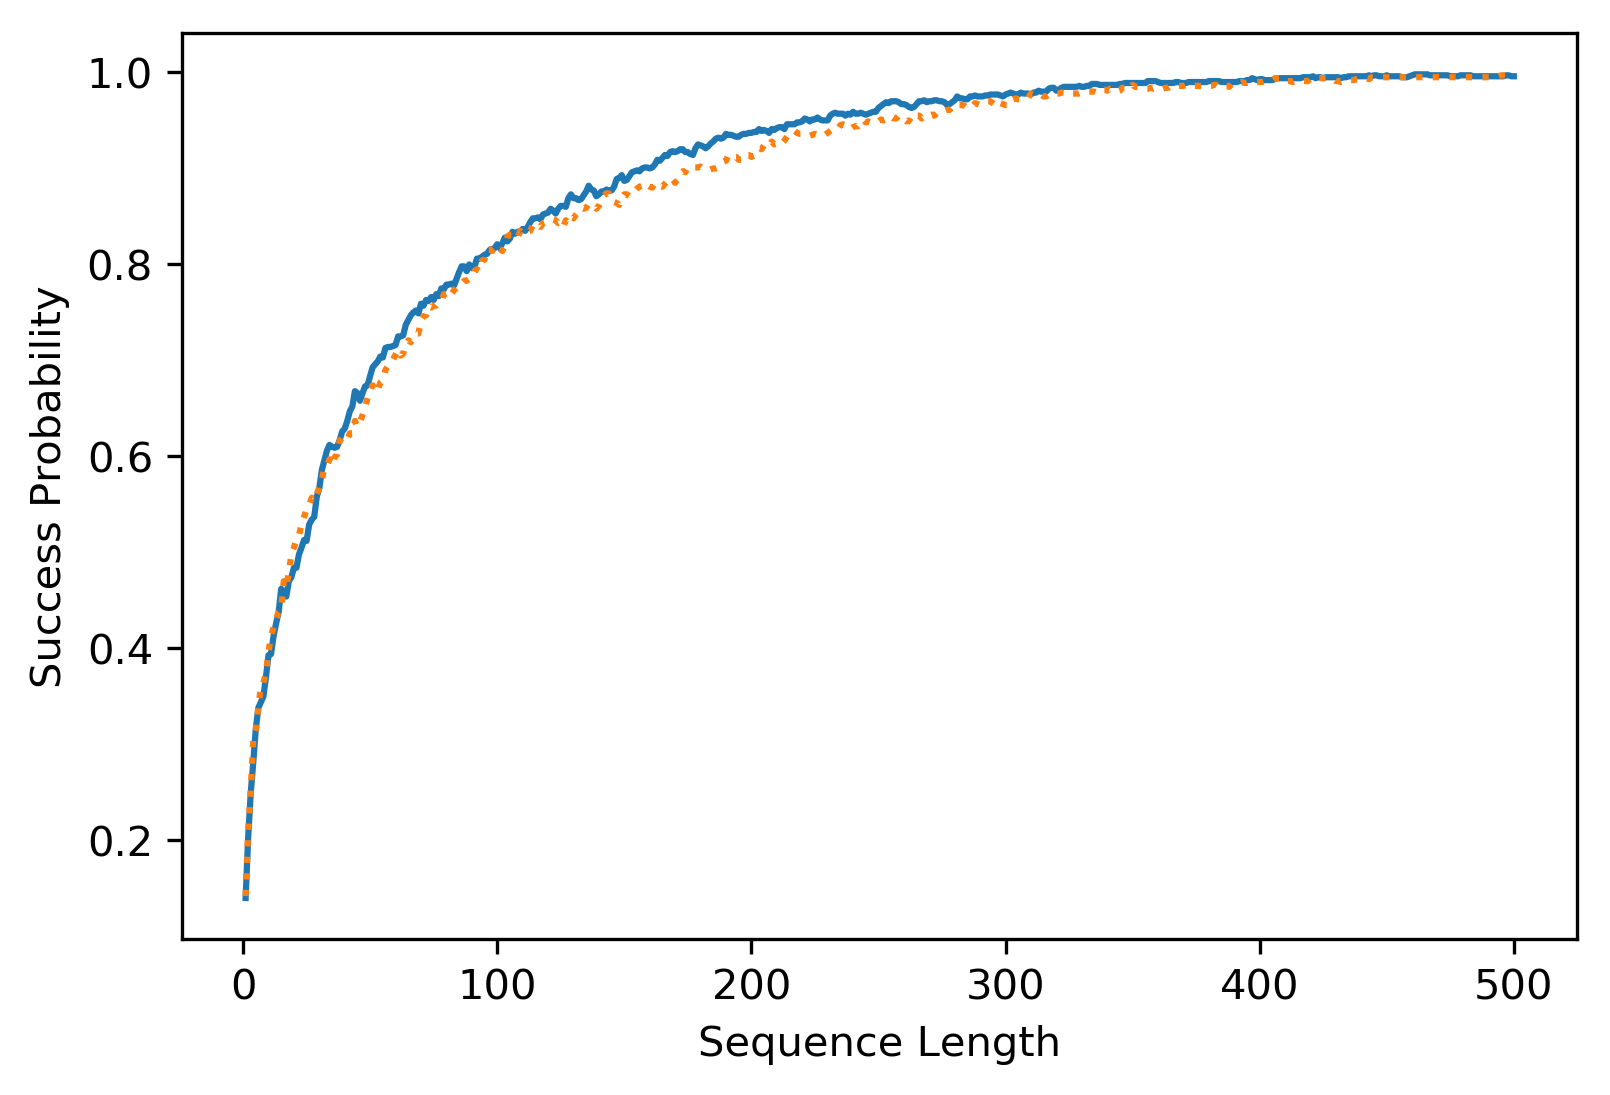

In [9]:
# EXP 5: success of LRT v. k
g, f, k, N = 0.1, 0.05, 500, 1000 # params used for freq_succ_pw 

freq_succ_ll = test_lrt(g,f,g,f,k,N)

plt.plot(np.arange(1,k+1),freq_succ_ll); 
plt.plot(np.arange(1,k+1),freq_succ_pw,':');
plt.xlabel('Sequence Length'), plt.ylabel('Success Probability');

We plot next the sequence length required for the three-way LRT to succeed with probability at least `target` as $f$ varies over an array of values `f_arr`. The results are consistent with a requirement scaling as $\propto f^{-2}$.

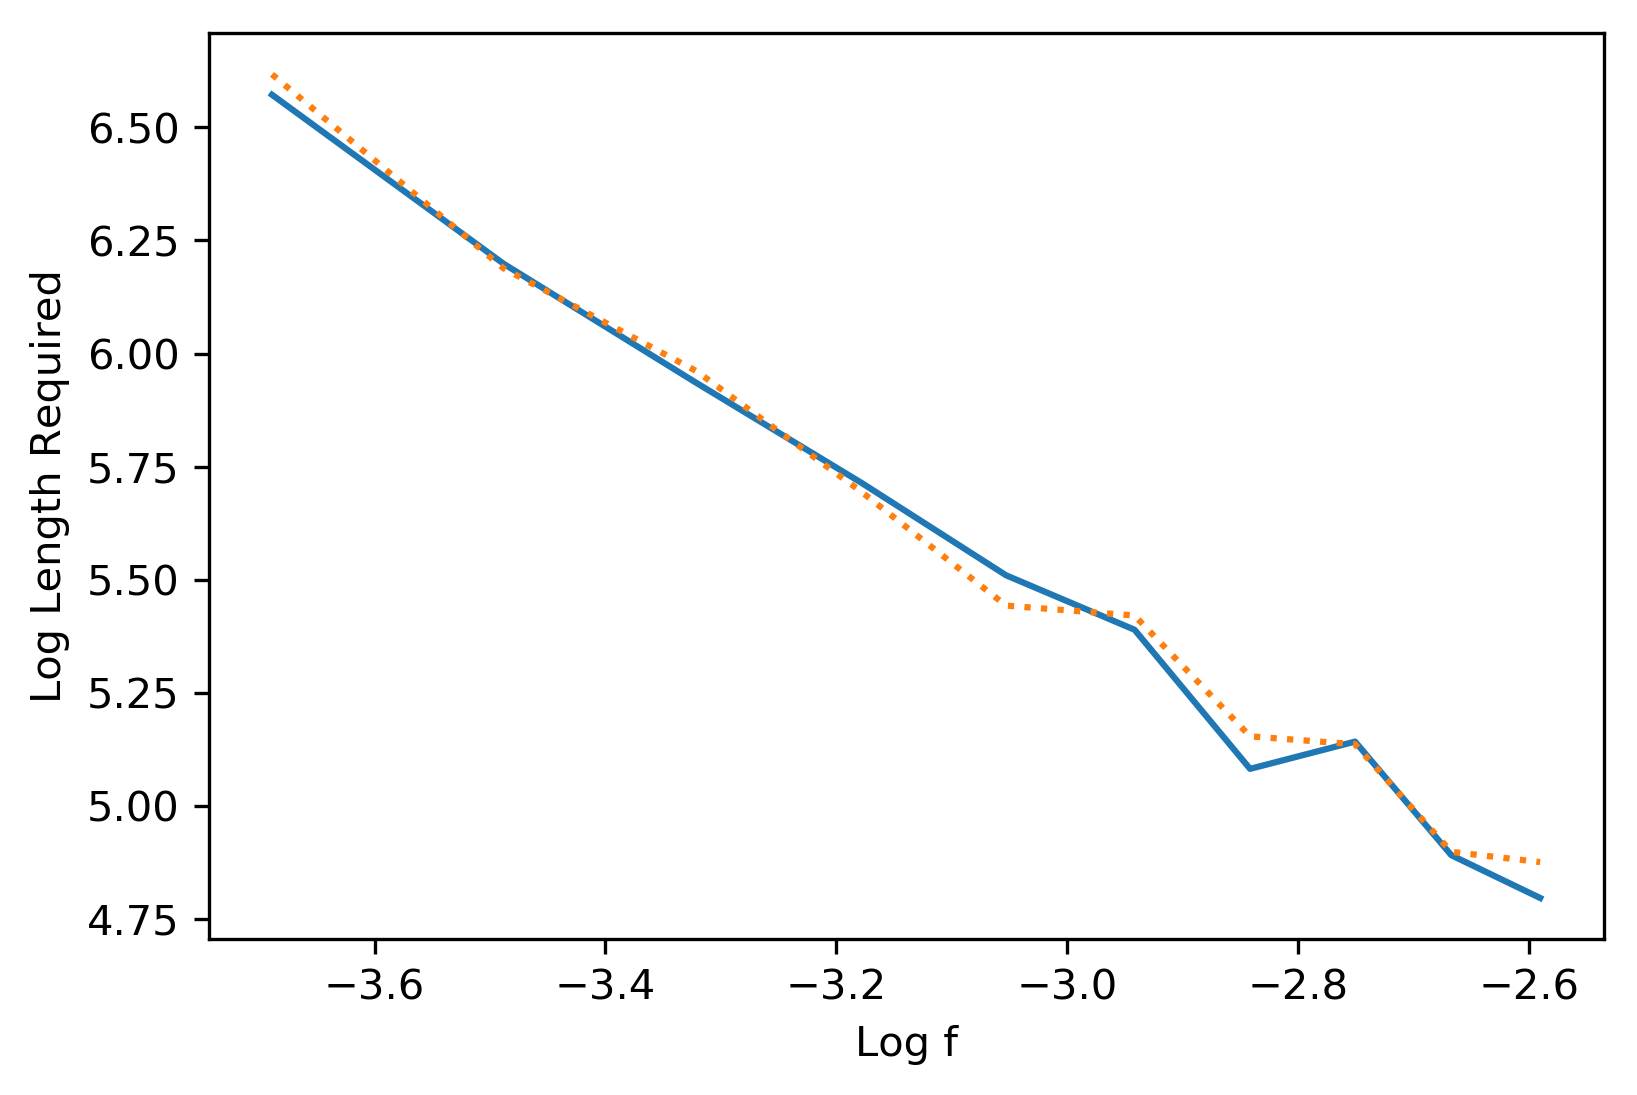

In [10]:
# EXP 6: requirement for LRT v. f
g, f, k, N, target = 0.1, 0.05, 2500, 1000, 0.95
f_arr_min, f_arr_max, f_arr_len = 0.025, 0.075, 10 # same as k_thres_f
f_arr = np.linspace(f_arr_min, f_arr_max, num=f_arr_len)

k_thres_fll = np.zeros(f_arr_len)
for i in range(f_arr_len):
    freq_succ = test_lrt(g,f_arr[i],g,f_arr[i],k,N)
    k_thres_fll[i] = np.min(np.nonzero(freq_succ>target))
        
plt.plot(np.log(f_arr), np.log(k_thres_fll)); 
plt.plot(np.log(f_arr),np.log(k_thres_f),':');
plt.xlabel('Log f'), plt.ylabel('Log Length Required');

We plot next the sequence length required for the three-way LRT to succeed with probability at least `target` as $g$ varies over an array of values `g_arr`. The results are consistent with a requirement scaling as exponentially in $g$.

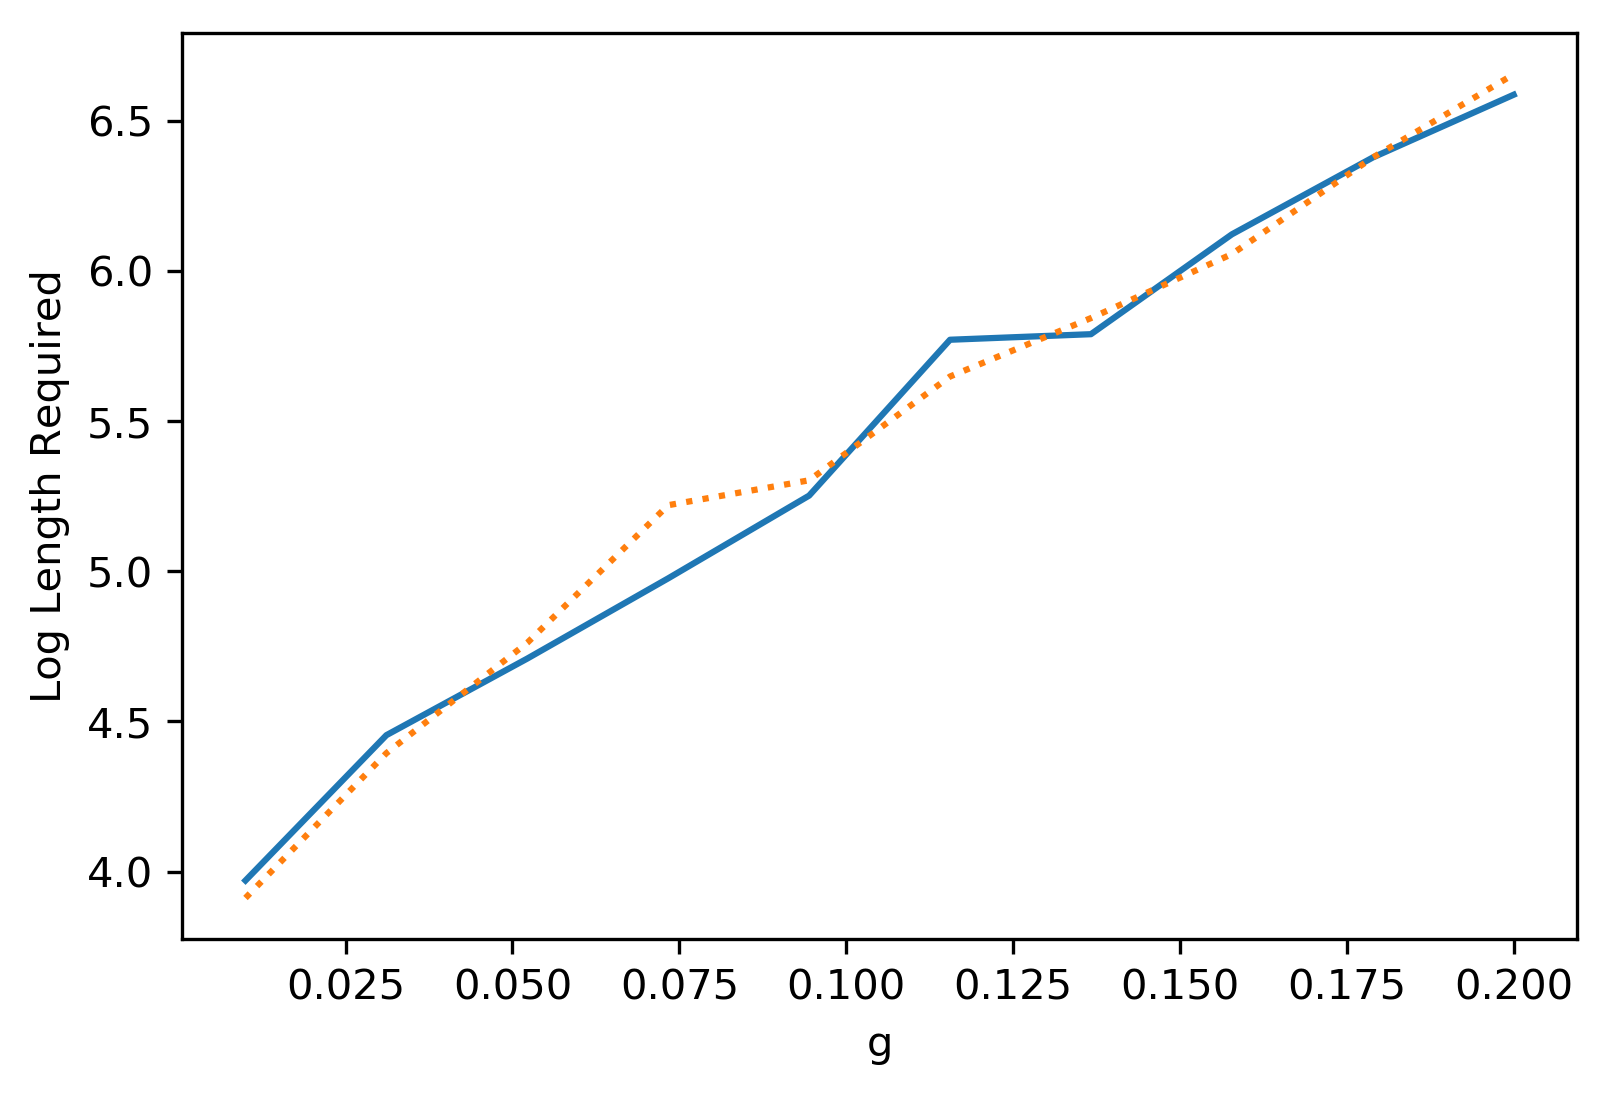

In [11]:
# EXP 7: requirement for LRT v. f
f, k, N, target = 0.05, 2500, 1000, 0.95
g_arr_min, g_arr_max, g_arr_len = 0.01, 0.2, 10 # same as k_thres_g
g_arr = np.linspace(g_arr_min, g_arr_max, num=g_arr_len)


k_thres_gll = np.zeros(g_arr_len)
for i in range(g_arr_len):
    freq_succ = test_lrt(g_arr[i],f,g_arr[i],f,k,N)
    k_thres_gll[i] = np.min(np.nonzero(freq_succ>target))
        
plt.plot(g_arr, np.log(k_thres_gll)); 
plt.plot(g_arr,np.log(k_thres_g),':');
plt.xlabel('g'), plt.ylabel('Log Length Required');

## Optimizing the branch lengths

Up to this point, we have ignored the effect of branch length estimation on the MLE. To get some partial insight into this difficult, but important issue, we consider a modified setting: we generate sequence datasets according to $AB|C_{g,f}$ and study how often the log-likelihood under $AB|C$ exceeds that of the alternative $AC|B$ &mdash; with the optimal choice of branch lengths in both cases in the limit $k \to +\infty$. For $AB|C$, the choices $g$ and $f$ are optimal under the expected log-likelihood by standard results in statistical theory (namely <a href="https://en.wikipedia.org/wiki/Gibbs%27_inequality">Gibbs' inequality</a>). 

For $AC|B$ however, it is not immediate what the right choice of branch lengths is when the data is generater under $AB|C$. We first run an experiment which estimates the log-likelihood for the model $AC|B$ over a grid of branch lengths $g$ and $f$ with a large value of $k$. The contour plot below, obtained under $AB|C$ with parameters `0.1` and `0.05`, suggests that in this case the optimal $f$ is $0$ while the optimal $g$ is somewhat larger than $0.1$. 

Optimal f = 0.0
Optimal g = 0.12959183673469388


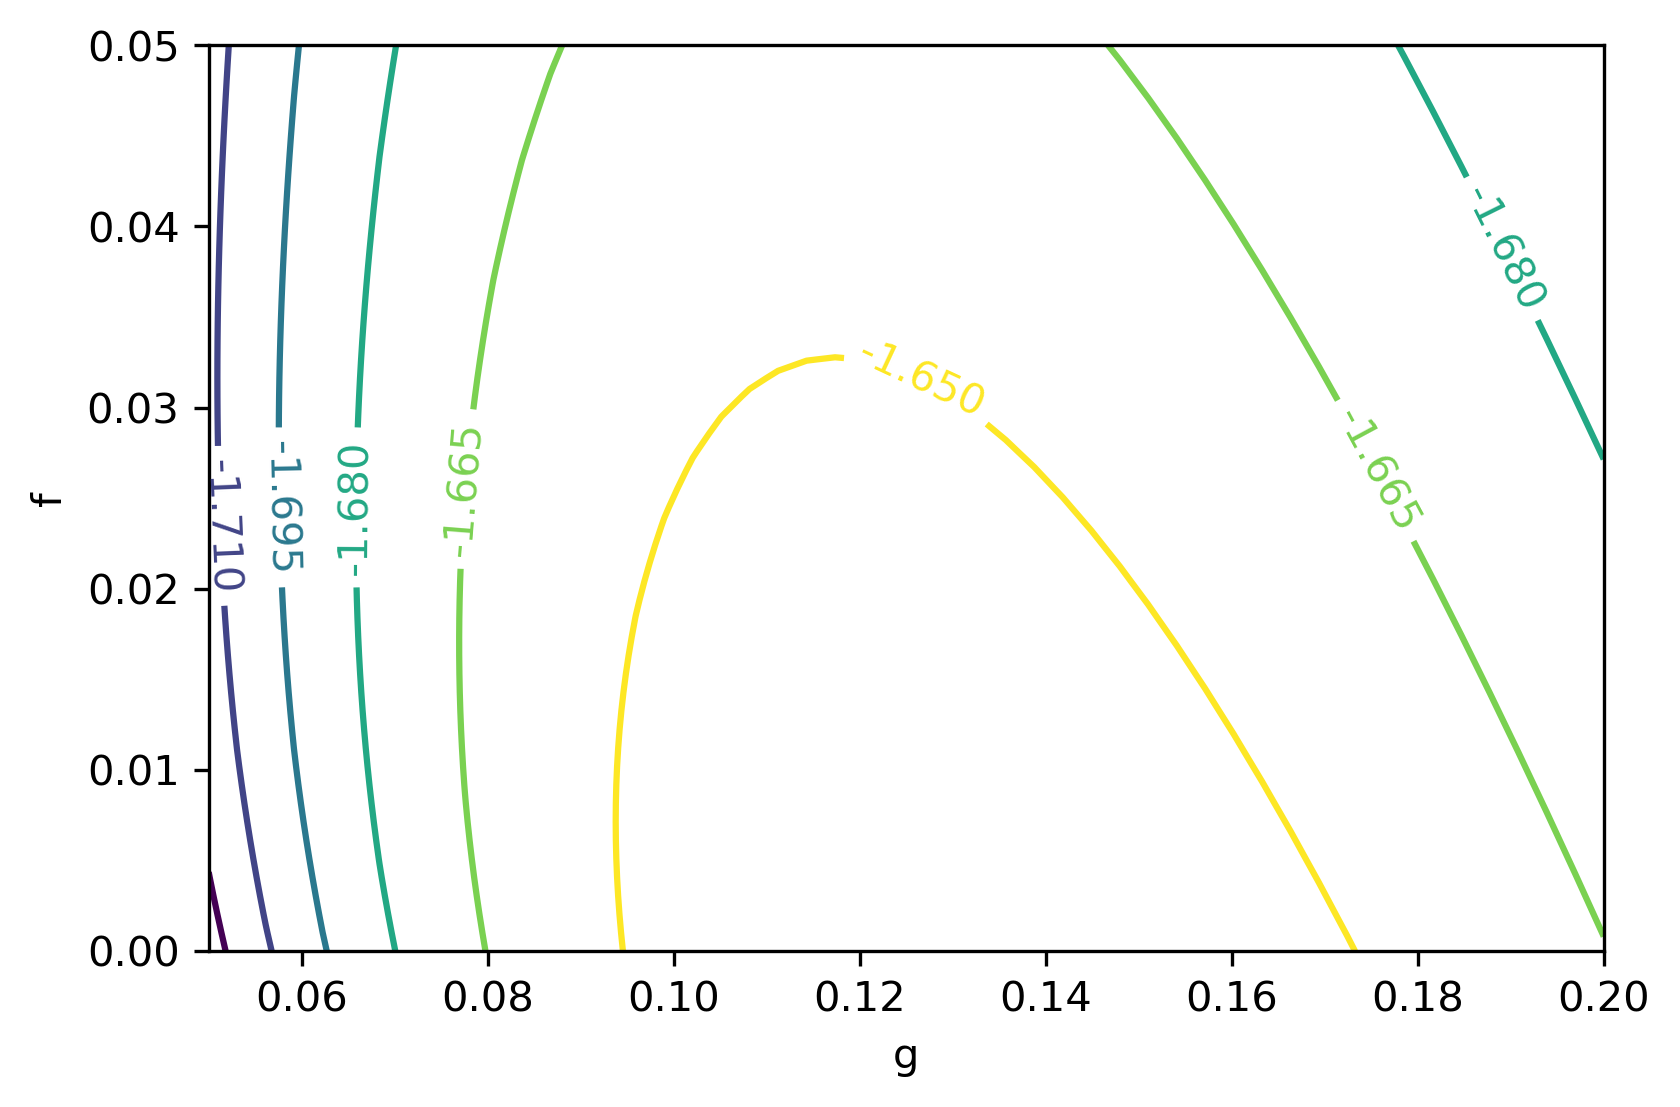

In [12]:
# EXP 8: a better choice of branch lengths for alternative
g, f, k, N, m_gr = 0.1, 0.05, 10000, 1, 50
f_gr = np.linspace(0, 0.05, num=m_gr)
g_gr = np.linspace(0.05, 0.20, num=m_gr)

sAB, sAC, sBC = AB_C(g,f,k,N)
ll_gf = np.zeros((m_gr,m_gr))
for i_f in range(m_gr):
    for i_g in range(m_gr):
        ll_gf[i_f,i_g] = np.sum(llXY_Z(g_gr[i_g],f_gr[i_f],sAC,sAB))/k       

opt_f = f_gr[np.unravel_index(np.argmax(ll_gf),np.shape(ll_gf))[0]]
opt_g = g_gr[np.unravel_index(np.argmax(ll_gf),np.shape(ll_gf))[1]]
print(f'Optimal f = {opt_f}')
print(f'Optimal g = {opt_g}')
[X, Y], Z = np.meshgrid(g_gr,f_gr), ll_gf
CS = plt.contour(X,Y,Z);
plt.clabel(CS), plt.xlabel('g'), plt.ylabel('f');

In other words, the experiment above indicates that for those parameters the star tree achieves the optimum under the alternative topology. We confirm this heuristically in the limit of small branch lengths. Note first that for $g$ and $f$ small, we have $p(g) = g + O(g^2)$ and $p(f) = f + O(f^2)$. Second, in this asymptotic setting, the first order contribution to the log-likelihood are those realizations involving a single substitution (except for the constant site). Using these two observations and the expression for the log-likelihood derived at the beginning of the section, it can be shown that the expected log-likelihood under the model $AC|B_{g_0,f_0}$ (for $g_0$, $f_0$ small) given data generated under $AB|C_{g,f}$ is to the first order
$$
\widetilde{\log\mathcal{L}}_0(g_0,f_0)
= (-3g_0 - 2 f_0)
+ (2g + 2f) \log g_0
+ g \log (g_0 + 2 f_0),
$$
where, for example, the last term correponds to $A$ disagreeing with $B$ but agreeing with $C$. The first term corresponds to the constant sites, where we used $\log(1-x) = -x + O(x^2)$ and ignored second order contributions. We seek to maximize $\widetilde{\log\mathcal{L}}_0(g_0,f_0)$ for fixed $g$ and $f$. The partial derivative with respect to $f_0$ is
$$
\partial_{f_0} \widetilde{\log\mathcal{L}}_0(g_0,f_0)
= -2 + 2 \frac{g}{g_0 + 2f_0}.
$$
Hence, for $g_0 < g$, $\partial_{f_0} \widetilde{\log\mathcal{L}}_0(g_0,f_0) = 0$ when $f_0$ satisfies $g = g_0 + 2f_0$. While for $g_0 \geq g$, $\partial_{f_0} \widetilde{\log\mathcal{L}}_0(g_0,f_0) < 0$ for all $f_0 \geq 0$ and the optimal $f_0$ for fixed $g_0$ is $0$. We plug back this optimal $f_0$ into $\widetilde{\log\mathcal{L}}_0(g_0,f_0)$, and consider the two cases again:
when $g_0 < g$, 
$$
\frac{\mathrm{d}}{\mathrm{d} g_0} \widetilde{\log\mathcal{L}}_0(g_0,(g-g_0)/2)
= -2 + \frac{2g + 2f}{g_0} > 0;
$$
when $g_0 \geq g$, 
$$
\frac{\mathrm{d}}{\mathrm{d} g_0} \widetilde{\log\mathcal{L}}_0(g_0,0)
= -3 + \frac{3g + 2f}{g_0},
$$
which is $0$ for $g_0$ satisfying $3g_0 = 3g + 2f$. To summarize, the optimal choice of branch lengths is therefore
$$
g_0^* = g + \frac{2}{3} f, \qquad f_0^* = 0.
$$
That is consistent with the contour plot above.

In the next experiment, we use parameters $g_0^*$ and $f_0^*$ for the alternatives and we plot the success probability of the three-way LRT. For large $k$, observe that the distance-based method (dotted line) performs better than the three-way LRT (solid line). For small $k$, however, the distance-based method performs worse, possibly because our optimal choice is only valid in the limit $k \to +\infty$.

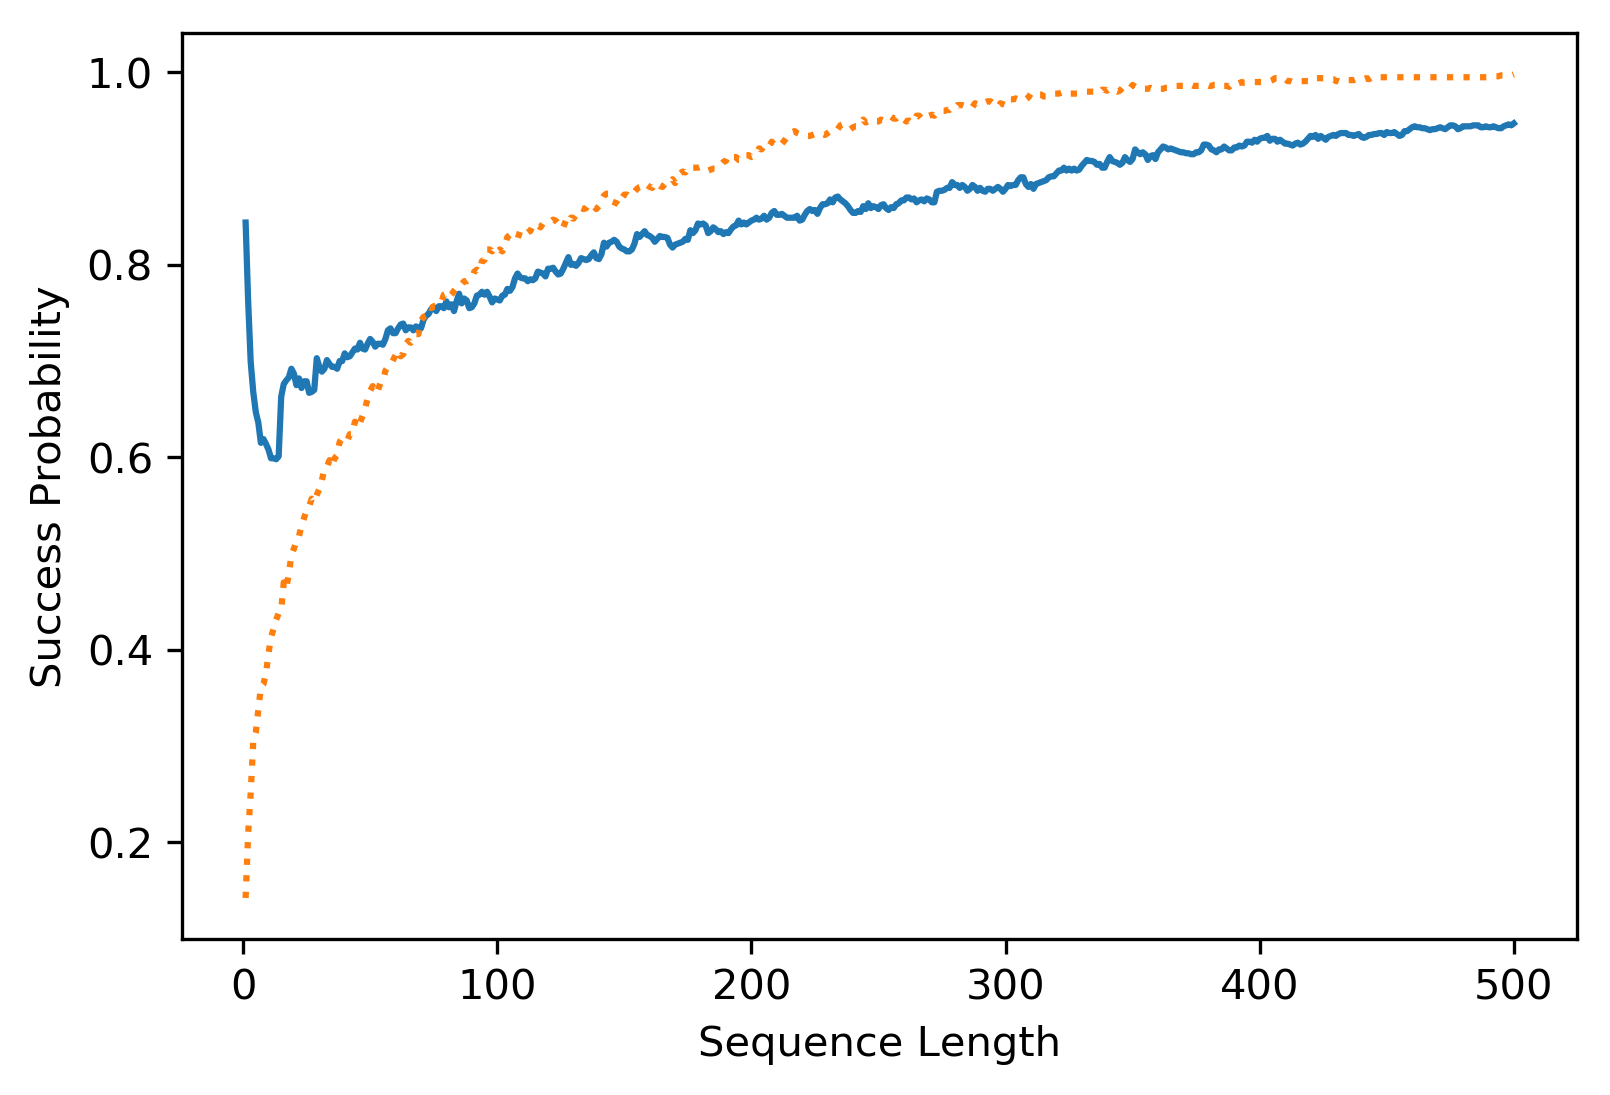

In [13]:
# EXP 9: accuracy of LRT v. k for better choice of lengths
g, f, k, N = 0.1, 0.05, 500, 1000 # params used for freq_succ_pw 

freq_succ_ll = test_lrt(g,f,g+(2/3)*f,0,k,N)

plt.plot(np.arange(1,k+1),freq_succ_ll); 
plt.plot(np.arange(1,k+1),freq_succ_pw,':');
plt.xlabel('Sequence Length'), plt.ylabel('Success Probability');

Using again parameters $g_0^*$ and $f_0^*$ for the alternative topologies, we plot the sequence length required for the three-way LRT to succeed with probability at least `target`. The results are consistent once again with a requirement scaling as $\propto f^{-2}$. This time, however, the requirement for LRT (solid line) is significantly higher than that of the distance-based approach (dotted line). While likelihood-based methods use the joint distribution of the data and, therefore, may be expected to perform better than distance-based methods which rely on pairwise distributions, in the three-species settings there may not be enough "extra information" in the joint distribution to compensate for the downsides of nuisance parameters.

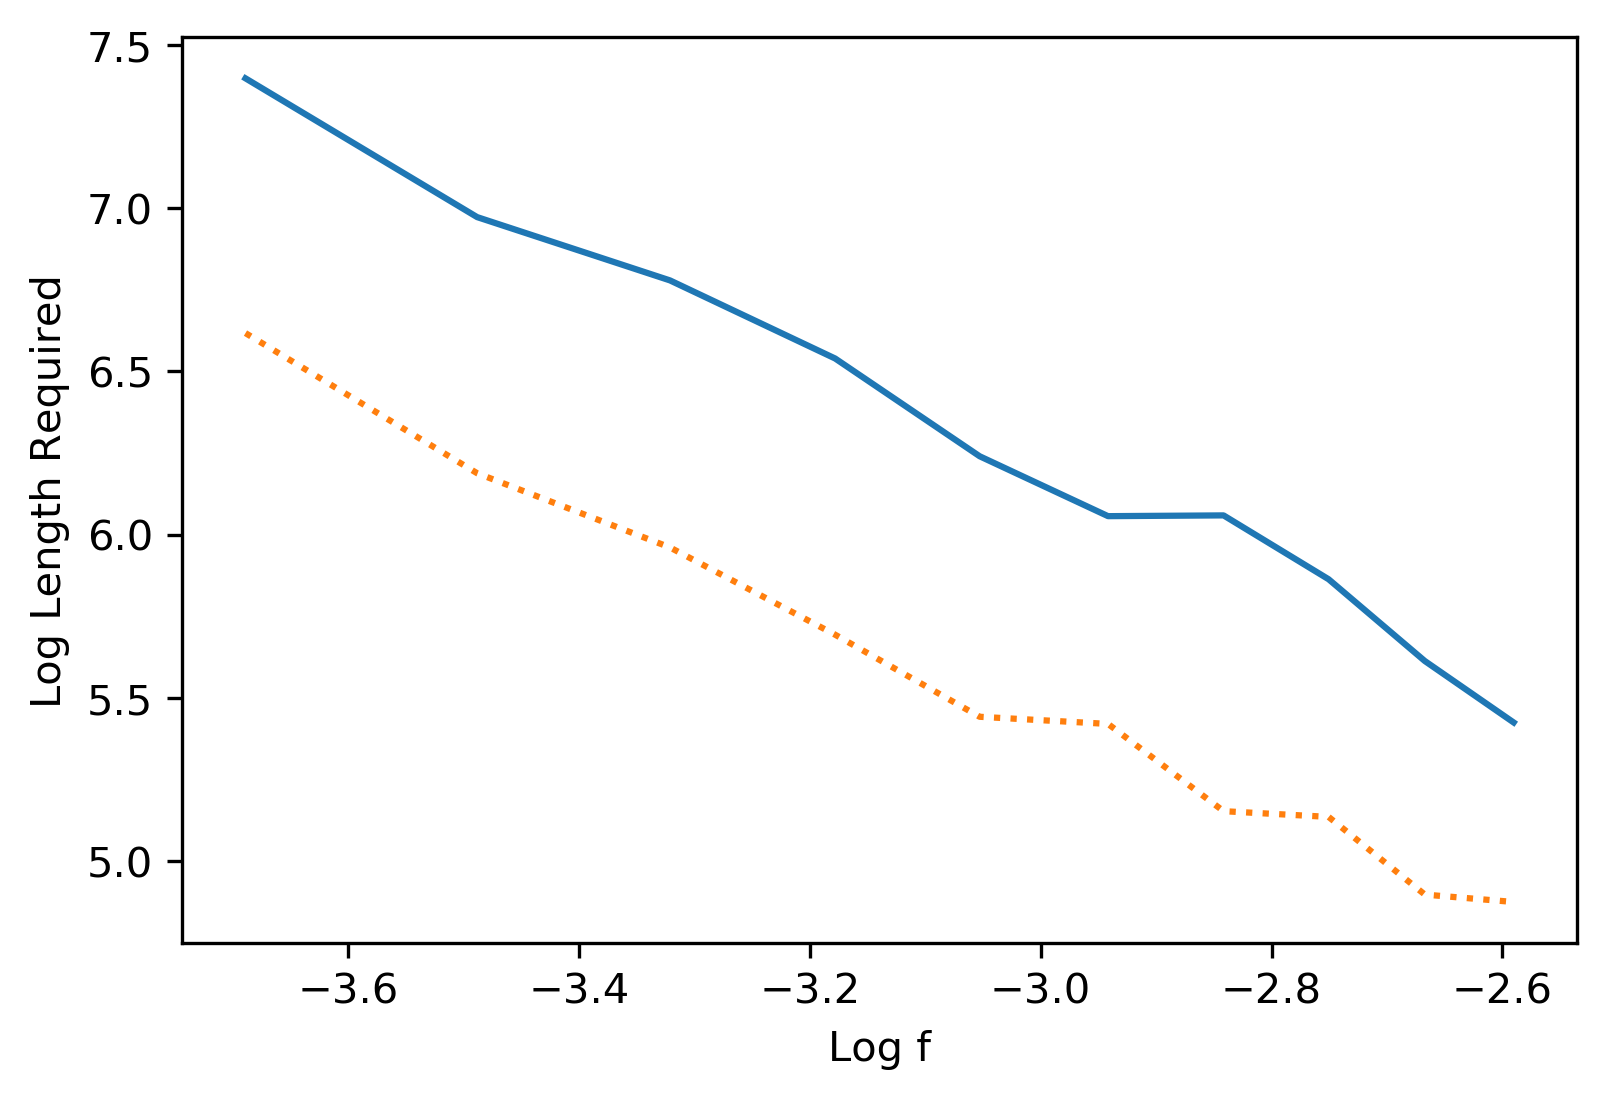

In [14]:
# EXP 10: requirement for LRT v. f for better choice of lengths
g, f, k, N, target = 0.1, 0.05, 2500, 1000, 0.95
f_arr_min, f_arr_max, f_arr_len = 0.025, 0.075, 10 # same as k_thres_f
f_arr = np.linspace(f_arr_min, f_arr_max, num=f_arr_len)

k_thres_fll = np.zeros(f_arr_len)
for i in range(f_arr_len):
    freq_succ = test_lrt(g,f_arr[i],g+(2/3)*f_arr[i],0,k,N)
    k_thres_fll[i] = np.min(np.nonzero(freq_succ>target))
        
plt.plot(np.log(f_arr), np.log(k_thres_fll)); 
plt.plot(np.log(f_arr),np.log(k_thres_f),':');
plt.xlabel('Log f'), plt.ylabel('Log Length Required');

# Lower bound on the best achievable requirement

In this section, we consider lower bounds on the sequence-length requirement. In particular we show &mdash; both analytically and numerically &mdash; that, in the three-species setting, the requirement we derived for distance-based and likelihood-based reconstruction approaches in previous sections cannot be improved (up to constants). These lower bounds are information-theoretic, i.e., they apply to any reconstruction method.

The standard way to obtain such a lower bound is to "make the problem easier" by considering the two-topology setup of the previous section. Namely, suppose the sequence dataset $\sigma_{L}^{(k)}$ is generated by a model in the class $\mathcal{P} = \{AB|C_{g,f}, AC|B_{g,f}\}$. Our goal again is to guess which one of the two models the data came from. How large does $k$ need to be for there to exist a reconstruction method that succeeds with probability $1-\delta$? A lower bound on the required $k$ for $\mathcal{P}$ automatically gives a lower bound on the required $k$ for the larger class $\cup_{g'\leq g, f' \geq f}\{AB|C_{g',f'}, AC|B_{g',f'}, BC|A_{g',f'}\}$ &mdash; since it includes $\mathcal{P}$.

Recall the definitions of $\mathcal{W}_{E,AB}[\Psi]$ and $\mathcal{W}_{E,AC}[\Psi]$ and let 
$$
\mathcal{W}_{E,\max}[\Psi]
=\max\{\mathcal{W}_{E,AB}[\Psi],\mathcal{W}_{E,AC}[\Psi]\},
$$
be the maximum probability of error for $\Psi$ under models in $\mathcal{P}$. We seek to establish a lower bound on $\mathcal{W}_{E,\max}[\Psi]$ that applies to any $\Psi$. We already know that
$$
\mathcal{W}_{E,\max}[\Psi]
\geq \frac{1}{2}\mathcal{W}_{I,II}[\mathbf{L}'].
$$
We first relate the r.h.s. to a standard notion of distance on probability measures. If $(\lambda_{x}:x\in \mathcal{X})$ and $(\gamma_{x}:x\in \mathcal{X})$ are probability measures over the discrete space $\mathcal{X}$, then their total variation distance is defined as
$$
\mathrm{TV}(\lambda,\gamma) 
= \frac{1}{2}\sum_{x \in \mathcal{X}} |\lambda_{x} - \gamma_{x}|,
$$
which is always between $0$ and $1$. We express $\mathcal{W}_{I,II}[\mathbf{L}']$ in terms of the total variation distance between $\mathcal{L}_{AB}^k$ and $\mathcal{L}_{AC}^k$.
By definition of $\mathbf{L}'$ and the fact that $\mathcal{L}_{AB}^k$ sums to 1, we get
$$
\mathcal{W}_{I,II}[\mathbf{L}']
=  1 -
\sum_{\sigma_L^{(k)}} (\mathcal{L}_{AB}^k(\sigma_L^{(k)}) - \mathcal{L}_{AC}^k(\sigma_L^{(k)})) \mathbb{1}[\mathcal{L}_{AB}^k(\sigma_L^{(k)}) > \mathcal{L}_{AC}^k(\sigma_L^{(k)})],
$$
where $\mathbb{1}[\mathcal{E}]$ is the indicator of the event $\mathcal{E}$. Using symmetry under the interchanging of the role of $B$ and $C$, we get further
$$
\mathcal{W}_{I,II}[\mathbf{L}']
=  1 -
\frac{1}{2}\sum_{\sigma_L^{(k)}} \left|\mathcal{L}_{AB}^k(\sigma_L^{(k)}) - \mathcal{L}_{AC}^k(\sigma_L^{(k)}) \right|
= 1 - \mathrm{TV}(\mathcal{L}_{AB}^k,\mathcal{L}_{AC}^k).
$$
By combining this with the inequality above, we have reduced the problem of deriving a lower bound on $\mathcal{W}_{E,\max}[\Psi]$ for any $\Psi$ to that of deriving an upper bound on the total variation distance between $\mathcal{L}_{AB}^k$ and $\mathcal{L}_{AC}^k$.

Computing $\mathrm{TV}(\mathcal{L}_{AB}^k,\mathcal{L}_{AC}^k)$ for arbitrary $k$ turns out to be tricky because of the underlying combinatorial complexity. Therefore, the next step is to further reduce the problem to a single site. We use a standard trick in statistical theory: moving to the Hellinger distance. Let
$$
\mathrm{H}^2(\lambda,\gamma) 
= \frac{1}{2}\sum_{x \in \mathcal{X}} \left(\sqrt{\lambda_{x}} - \sqrt{\gamma_{x}}\right)^2,
$$
be the Hellinger distance between probability measures $\lambda$ and $\gamma$, which is always between $0$ and $1$. This unintuitive distance has two useful properties. First, it is closely related to the more natural total variation distance, through the following inequality which we derive for completeness. (There is also an inequality in the other direction, which we omit.) Writing
$$
\sum_{x \in \mathcal{X}} |\lambda_{x} - \gamma_{x}|
= \sum_{x \in \mathcal{X}} \left(\sqrt{\lambda_{x}} - \sqrt{\gamma_{x}}\right)\left(\sqrt{\lambda_{x}} + \sqrt{\gamma_{x}}\right)
$$
and applying the Cauchy-Shwarz inequality, we get
$$
\sum_{x \in \mathcal{X}} |\lambda_{x} - \gamma_{x}|
\leq
\sqrt{\sum_{x \in \mathcal{X}} \left(\sqrt{\lambda_{x}} - \sqrt{\gamma_{x}}\right)^2} \sqrt{\sum_{x \in \mathcal{X}} \left(\sqrt{\lambda_{x}} + \sqrt{\gamma_{x}}\right)^2}
$$
Using the fact that $\lambda$ and $\gamma$ sum to 1 and applying the Cauchy-Shwarz inequality again,
$$
\sum_{x \in \mathcal{X}} \left(\sqrt{\lambda_{x}} + \sqrt{\gamma_{x}}\right)^2
= 2 + 2\sum_{x \in \mathcal{X}} \sqrt{\lambda_{x}}\sqrt{\gamma_{x}}
\leq 2 + 2 \sqrt{\sum_{x \in \mathcal{X}} \lambda_{x}}\sqrt{\sum_{x \in \mathcal{X}} \gamma_{x}} = 4.
$$
Hence
$$
\mathrm{TV}(\lambda,\gamma)
\leq \sqrt{2 \mathrm{H}^2(\lambda,\gamma)}.
$$
Second, the Hellinger distance (somewhat magically) "tensorizes": let $\lambda^{\otimes k}$ be the distribution of $k$ independent samples from $\lambda$, we have
$$
1 - \mathrm{H}^2(\lambda^{\otimes k},\gamma^{\otimes k})
= \sum_{\mathbf{x}\in \mathcal{X}^k} \prod_{i=1}^k \sqrt{\lambda_{x_i} \gamma_{x_i}}
= \left(\sum_{x\in \mathcal{X}} \sqrt{\lambda_{x} \gamma_{x}}\right)^k
= \left(1 - \mathrm{H}^2(\lambda,\gamma)\right)^k.
$$

Putting everything together, we finally get the following key result: for any randomized test $\Psi$
$$
\mathcal{W}_{E,\max}[\Psi]
\geq \frac{1}{2}\left[1 - \sqrt{2\left[1 - \left(1-\mathrm{H}^2(\mathcal{L}_{AB}^1,\mathcal{L}_{AC}^1)\right)^k\right]}\right].
$$

So it remains to bound $\mathrm{H}^2(\mathcal{L}_{AB}^1,\mathcal{L}_{AC}^1)$, which can be estimated both numerically and analytically. The numerical experiment below computes the Hellinger-based lower bound on $\mathcal{W}_{E,\max}[\Psi]$ for a fixed `g` and for $k$ scaling like $\propto f^{-2}$, for an array `f_arr` of values of $f$. The plots indicate that the lower bound increases towards $1/2$ when $k = b f^{-2}$ for $b$ ranging between $0.01$ and $1$. Note that, when $b=1$, the lower bound on the probability of error is negative, which is of course useless. This is because our bound relating $\mathrm{TV}$ and $\mathrm{H}^2$ is off by a factor of $\sqrt{2}$ when the probability measures are close to maximally distinct.

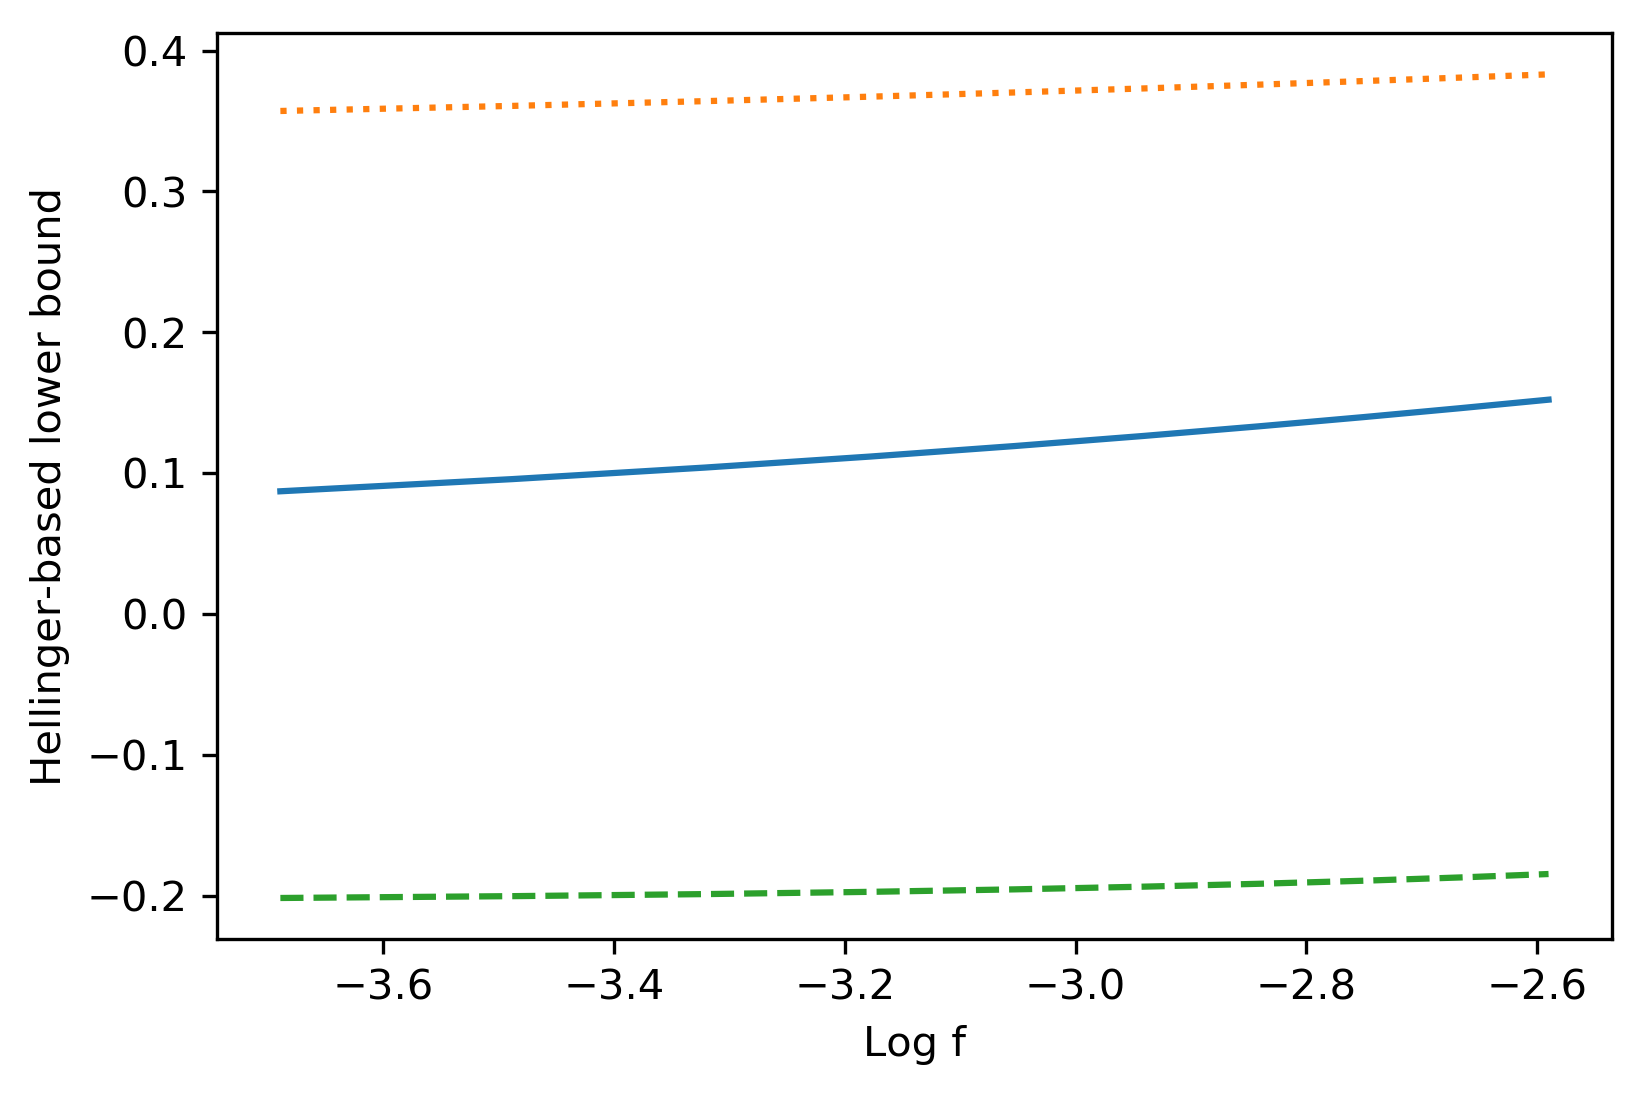

In [15]:
# EXP 11: Hellinger distance between AB|C and AC|B v. f
g = 0.1
f_arr_min, f_arr_max, f_arr_len = 0.025, 0.075, 10
f_arr = np.linspace(f_arr_min, f_arr_max, num=f_arr_len)

hell, s = np.zeros(f_arr_len), [-1,1]
for i in range(f_arr_len):
    for jAB in range(2):
        for jAC in range(2):
            lAB = exp(llXY_Z(g,f_arr[i],s[jAB],s[jAC]))
            lAC = exp(llXY_Z(g,f_arr[i],s[jAC],s[jAB]))
            hell[i] = hell[i] + 2*((sqrt(lAB)-sqrt(lAC))**2)/2
            
base = (1-hell)**(1/(f_arr**2)) 
plt.plot(np.log(f_arr),(1/2)*(1 - np.sqrt(2*(1-base**0.1))));
plt.plot(np.log(f_arr),(1/2)*(1 - np.sqrt(2*(1-base**0.01))),':'); 
plt.plot(np.log(f_arr),(1/2)*(1 - np.sqrt(2*(1-base**1))),'--');
plt.xlabel('Log f'), plt.ylabel('Hellinger-based lower bound');

We confirm the results above analytically. Fix $g$ and consider the limit $f \to 0$. By symmetry, for constant sites $\sigma_L^1$, $\mathcal{L}^1_{AB}(\sigma_L^1) = \mathcal{L}^1_{AC}(\sigma_L^1)$ so such sites contribute nothing to $H^2(\mathcal{L}_{AB}^1,\mathcal{L}_{AC}^1)$. The same holds for the sites $\sigma_L^1 = (+1,-1,-1)$ and $\sigma_L^1 = (-1,+1,+1)$. For the sites $\sigma_L^1 = (+1,+1,-1)$ and $\sigma_L^1 = (-1,-1,+1)$, we use the expression for the likelihood derived in the previous section with $I_{AB}^1 = 1$ and $I_{AC}^1 = 0$. Let $p = p(g)$ and $q = p(g+2f)$ and expand to the first order in $f$ to get that $q = p + c_1 f + O(f^2)$ where $c_1 = 2e^{-2g}$. Then we have
$$
\mathcal{L}^1_{AB}(\sigma_L^{1})
= \frac{1}{2}(1-p)^2 q + \frac{1}{2}p^2 (1-q)
= \frac{1}{2}(1-p)^2 p + \frac{1}{2}p^2 (1-p)
+ c_2 f + O(f^2),
$$
where $c_2 = \frac{c_1}{2}[(1-p)^2 - p^2] = \frac{c_1}{2}(1-2p)$, and
$$
\mathcal{L}^1_{AC}(\sigma_L^{1})
= \frac{1}{2}(1-p) p (1-q) + \frac{1}{2}p (1-p) q
= \frac{1}{2}(1-p)^2 p + \frac{1}{2}p^2 (1-p)
+ c_3 f + O(f^2),
$$
where $c_3 = \frac{c_1}{2}[-(1-p)p + p(1-p)] = 0$. Using $\sqrt{z+x} = \sqrt{z} + x/(2\sqrt{z}) + O(x^2)$ and letting $z = \frac{1}{2}(1-p)^2 p + \frac{1}{2}p^2 (1-p) = \frac{1}{2}p(1-p)$, we get
$$
\sqrt{\mathcal{L}^1_{AB}(\sigma_L^{1})}-\sqrt{\mathcal{L}^1_{AC}(\sigma_L^{1})}
= c_4 f + O(f^2),
$$
where $c_4 = c_2/(2 \sqrt{z})$. So the contribution of $\sigma_L^1$ to $\mathrm{H}^2(\mathcal{L}_{AB}^1,\mathcal{L}_{AC}^1)$ is $\frac{1}{2}c_4^2 f^2 + O(f^3)$. By interchanging the role of $B$ and $C$, we see that the contribution from the sites $\sigma_L^1 = (+1,-1,+1)$ and $\sigma_L^1 = (-1,+1,-1)$ is the same. So finally
$$
\mathrm{H}^2(\mathcal{L}_{AB}^1,\mathcal{L}_{AC}^1)
= c_5 f^2 + O(f^3).
$$
where $c_5 = 2 c_4^2$. 

Hence, taking $k = b f^{-2}$ in our Hellinger-based lower bound on the maximum probability of error, we get that
$$
\mathcal{W}_{E,\max}[\Psi]
\geq \frac{1}{2}\left[1 - \sqrt{2\left[1 - \left(1-c_5 f^2 + O(f^3)\right)^{b f^{-2}}\right]}\right],
$$
which, as $f \to 0$, converges to
$$
\frac{1}{2}\left[1 - \sqrt{2\left[1 - e^{-c_5 b}\right]}\right].
$$
This last expression is $1/2$ when $b=0$, and it decreases monotonically as $b$ gets larger. 

To summarize, no method can have a maximum probability of error bounded away from $1/2$ unless $k$ scales at least like $\propto f^{-2}$.

# Scaling up to large trees

Until now, we have restricted ourselves to small phylogenies. The results we have derived in the previous sections can be used as building blocks to obtain some bounds on sequence-length requirements for large trees as well. 

In the molecular clock case, one can reconstruct all three-leaf subtrees of an $n$-species phylogenies $T$ using the simple distance-based method described earlier. Once all such "triplets" have been reconstructed correctly, it is straightforward to infer the full rooted phylogeny. What is the sequence-length requirement in this case? Assume $g$ and $f$ are respectively the longest and shortest branch lengths in $T$. Recall that if the sequence length $k$ satisfies
$$
k \geq \frac{2 \ln (2/\delta)}{e^{-4G} \left(1 - e^{-4F}\right)^2},
$$
then the pairwise comparison test $\mathbf{D}$ succeeds at reconstructing a fixed triplet $\{A,B,C\}$ with probability greater than $1-\delta$. Here $G$ is the length of the path to the most recent common ancestor of the two closest leaves in $\{A,B,C\}$ and $F$ is the length of the path from that vertex to the root of the triplet. To obtain a bound on the sequence-length requirement, we need to bound $F$, $G$ and $\delta$ in terms of $f$, $g$ and $n$.

We use that necessarily $F \geq f$. As for $\delta$, since there are at most $n^3$ triplets, for all of them to be reconstructed correctly with probability $1-\delta'$ we require $\delta = \delta'/n^{3}$. It remains to upper bound $G$, which depends on the minimum number of edges $h$ from a leaf to the root. Because $T$ is binary and has $n$ leaves, we have
$$
n \geq 2^h.
$$
Hence$$
G \leq gh \leq g \log_2 n.
$$
Putting everything together, when the sequence length satisfies
$$
k \geq \frac{6 \ln (2n /\delta')}{e^{-4g \log_2 n} \left(1 - e^{-4f}\right)^2},
$$
reconstruction of $T$ with probability $1-\delta'$ is possible. This bound differs from that of a three-species phylogeny in two ways: 1) a factor of $\log n$ accounts for the fact that a polynomial in $n$ number of triplets must be correclty recontructed; 2) a polynomial factor in $n$ (namely $e^{4g \log_2 n}$) accounts for the depth of the phylogeny. As it turns out, the latter &mdash; the role of the depth &mdash; is more intricate than our naive analysis suggests. We discuss this next. 

## Signal decay

The extent to which the depth of a phylogeny affects the sequence-length requirement of reconstruction methods depends strongly on the branching rate. To highlight this subtle phenomenon, we first consider a different problem: reconstructing an ancestral state. We begin with a numerical simulation. The function `full` generates `N` samples of sequence length `k` at the leaves of a full binary tree with `h` levels where all branch lengths are equal to `b`. More specifically what is generated is, for each site, the total number of substitutions on level `h` compared to the root state. While this does not fully characterize the sequences at the leaves, it will suffice for our purposes. The function `test_maj` then infers the root sequence by majority vote over the leaves on a single site and outputs the fraction of successful reconstructions over `N` attempts.

In [16]:
def child(s,i,p): # number of subs to one child of each parent
    return np.random.binomial(s,1-p) + np.random.binomial(2**i-s,p)

def full(b,k,h,N): # number of subs at leaves of full binary tree
    ns_root = np.zeros((N,k),dtype=int)
    for i in range(h):
        ns_root = child(ns_root,i,l2p(b)) + child(ns_root,i,l2p(b))
    return ns_root

def test_maj(b,h,N): # ancestral reconstruction by majority over leaves
    return np.sum(full(b,1,h,N)<2**(h-1))/N

The following experiment tests the accuracy of ancestral state reconstruction by majority vote as the number of levels increases for two different values of branch lengths, `b0` and `b1`. In both cases, the probability of correct reconstruction roughly decreases with the number of levels. However, we see that for the longer branch length `b1` (dotted line) the probability of correct reconstruction appears to converge to $1/2$, while that probability settles on a much larger value for the shorter branch length `b0` (solid line). Note that a success probability of $1/2$ corresponds to guessing at random.

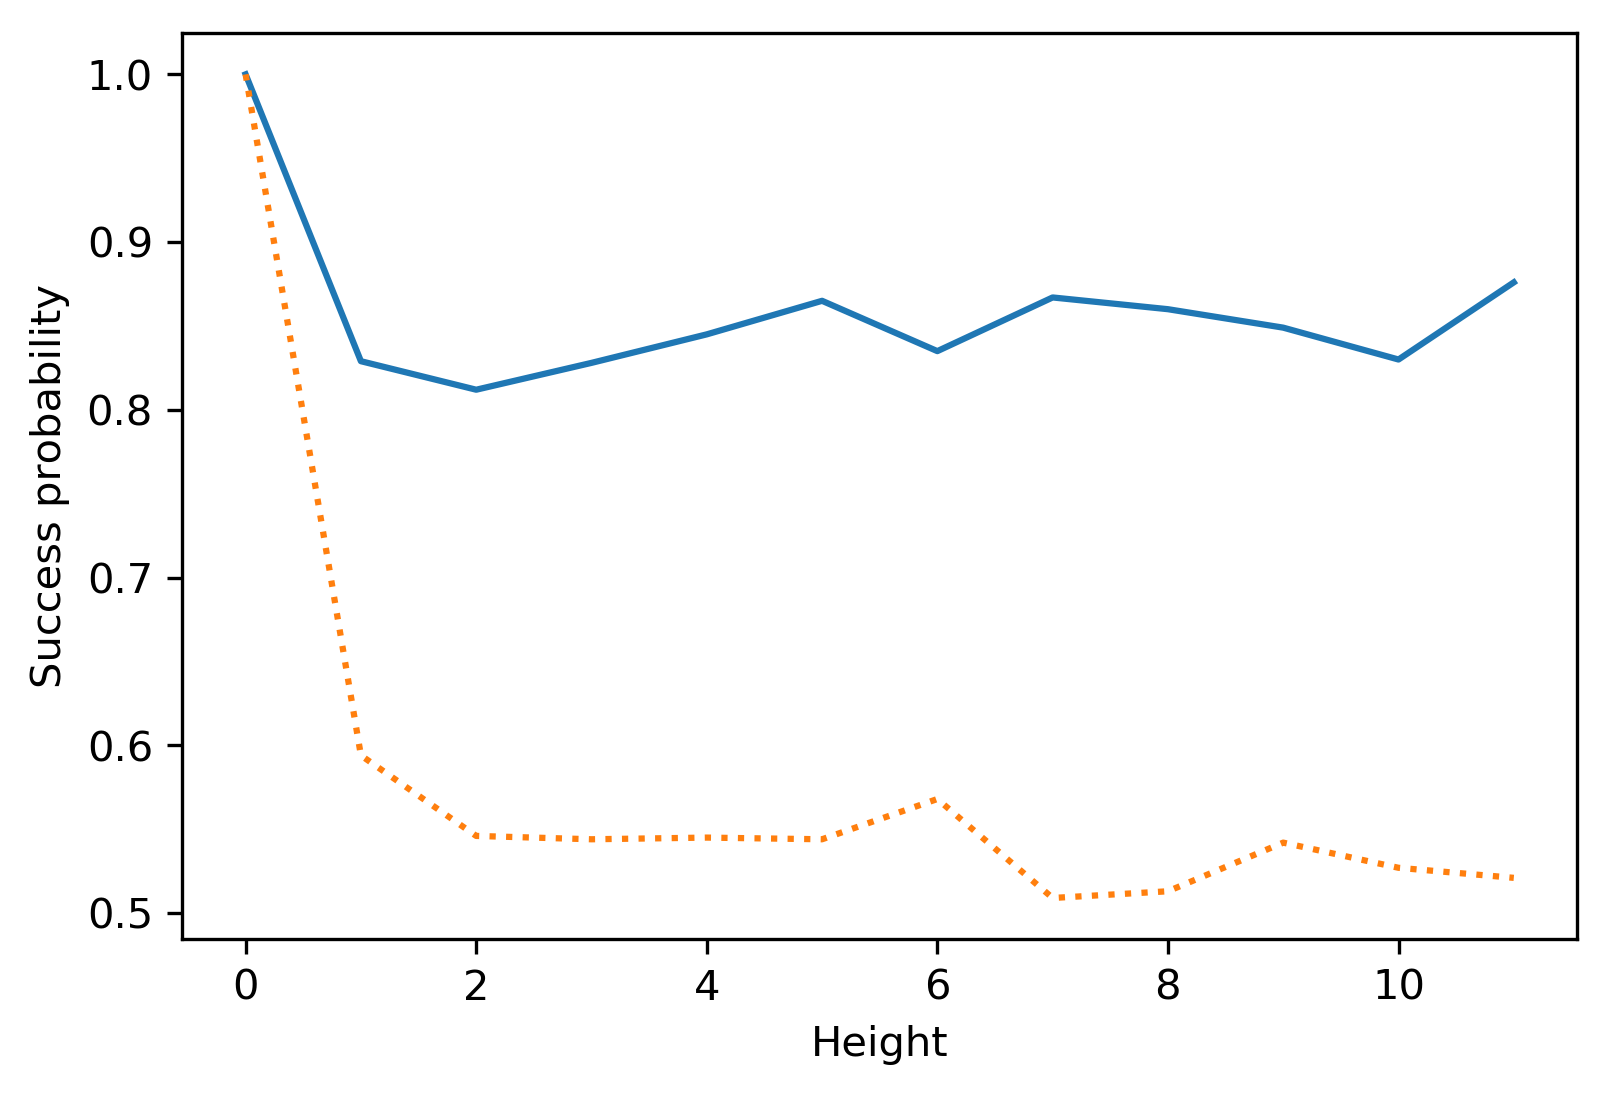

In [17]:
# EXP 12: accuracy of ancestral reconstruction by majority v. h
b0, b1, k, h, N = 0.1, 0.3, 1, 12, 1000

freq_succ0, freq_succ1 = np.zeros(h), np.zeros(h)
for i in range(h):
    freq_succ0[i], freq_succ1[i] = test_maj(b0,i,N), test_maj(b1,i,N)

plt.plot(np.arange(h),freq_succ0); 
plt.plot(np.arange(h),freq_succ1,':');
plt.xlabel('Height'), plt.ylabel('Success probability');

We next explain this significant difference analytically. Precisely, we compute the variance of the ancestral state estimator above and show that it undergoes a phase transition as the branch length $b$ increases. Let $T = (V,E)$ be a full binary tree with $h$ levels and all branch lenghts equal to $b$. Let $R$ be its root and $L = \{A_1,\ldots,A_{2^h}\}$ be its leaves. Assume that $(\sigma_v : v \in V)$ is a single site on $T$ generated under the CF model. In particular, $\sigma_L$ denotes the states at the leaves. We are interested in the following natural estimator of the root state $\sigma_R$ from $\sigma_L$: take a majority vote over the states at the leaves (or pick uniformly at random in case of a tie). In our setting, this estimator is equivalent to the sign of the average state at the leaves, which for convenience we normalize as follows,
$$
\mathcal{A}_{h,\theta} = \frac{1}{2^h \theta^h}\sum_{i=1}^{2^h} \sigma_{A_i},
$$
where $\theta := \theta(b)$.

To analyze this estimator, we first show that $\mathcal{A}_{h,\theta}$ is conditionally unbiased, given the state at the root. Indeed, we get by symmetry
$$
\mathbb{E}\left[\mathcal{A}_{h,\theta}\middle|\sigma_R \right]
= \frac{1}{\theta^h} \mathbb{E}\left[\sigma_{A_1}\middle|\sigma_R \right].
$$
Recalling that $P(R,A_1)$ are the edges on the path between $R$ and $A_1$ and using the formulas derived previously, we then get
$$
\mathbb{E}\left[\mathcal{A}_{h,\theta}\middle|\sigma_R \right]
= \frac{1}{\theta^h} \mathbb{E}\left[\sigma_R \prod_{e \in P(R,A_1)} \tau_e \middle|\sigma_R \right]
= \frac{1}{\theta^h} \sigma_R \theta^h
= \sigma_R.
$$
Next, we study the variance of $\mathcal{A}_{h,\theta}$. By a standard formula, 
$$
\mathrm{Var}\left[\mathcal{A}_{h,\theta}\middle|\sigma_R\right]
= 
\frac{1}{2^{2h}\theta^{2h}}  \mathbb{E}\left[\left(\sum_{i=1}^{2^h} \sigma_{A_i}\right)^2\middle|\sigma_R\right] 
- \left(\mathbb{E}\left[\mathcal{A}_{h,\theta}\middle|\sigma_R \right]\right)^2.
$$
We have already computed the second term on the r.h.s., which is $1$. For the first term we observe that the expectation is equal to
$$
\sum_{i,j=1}^{2^h} \mathbb{E}\left[\sigma_{A_i}\sigma_{A_j}\middle|\sigma_R\right] 
= \sum_{i,j=1}^{2^h} \mathbb{E}\left[\left(\sigma_R \prod_{e \in P(R,A_i)} \tau_e\right) \left(\sigma_R \prod_{e \in P(R,A_j)} \tau_e\right) \middle|\sigma_R\right].
$$
Let $A_i \land A_j$ be the most recent common ancestor of $A_i$ and $A_j$ and let $h_{i\land j}$ be the graph distance from the root to $A_i \land A_j$. Then cancellations on the path from the root to $A_i \land A_j$ lead to the simplified expression
$$
\mathbb{E}\left[\left(\sigma_R \prod_{e \in P(R,A_i)} \tau_e\right) \left(\sigma_R \prod_{e \in P(R,A_j)} \tau_e\right) \middle|\sigma_R\right]
= \mathbb{E}\left[\prod_{e \in P(A_i \land A_j,A_i)} \tau_e \prod_{e \in P(A_i \land A_j,A_j)} \tau_e\right]
= \theta^{2h-2h_{i\land j}}.
$$
Plugging this back above and decomposing the sum over the levels of $T$, we get
$$
\sum_{i,j=1}^{2^h} \mathbb{E}\left[\sigma_{A_i}\sigma_{A_j}\middle|\sigma_R\right]
= \sum_{m=0}^{h} 2^{m} \left(2^{h-m-1}\right)^2 \theta^{2h-2m}
= \frac{1}{4}\sum_{m=0}^{h} 2^{2h-m} \theta^{2h-2m},
$$
where the term $\left(2^{h-m-1}\right)^2$ counts the number of pairs $A_i$, $A_j$ whose most recent common ancestor $A_i \land A_j$ is a fixed vertex $v$ on level $m$, while the term $2^{m}$ counts the number of such vertices $v$. Finally
$$
\mathrm{Var}\left[\mathcal{A}_{h,\theta}\middle|\sigma_R\right]
= \frac{1}{4}\sum_{m=0}^{h} (2\theta^2)^{-m} - 1.
$$
The key observation is that the limit of this variance as the height goes to $+\infty$ depends crucially on the quantity $2\theta^2$:
$$
\mathrm{Var}\left[\mathcal{A}_{h,\theta}\middle|\sigma_R\right]
\to \begin{cases}+\infty &\text{if $2\theta^2 \leq 1$,}\\ \frac{1}{4(1-(2\theta^2)^{-1})} - 1 & \text{if $2\theta^2 > 1$.}\end{cases}
$$
Intuitively this can be interpreted as follows: when the variance goes to $+\infty$, the estimator $\mathcal{A}_{h,\theta}$ is essentially unable to distinguish between the cases $\sigma_R = +1$ and $\sigma_R = -1$. 

This in indeed what we observe on the plot above. Note that, in terms of branch lengths, the critical threshold is
$$
2 (e^{-2b})^2 = 1 \iff b = \frac{1}{2} \log \sqrt{2} = 0.173...
$$
Hence, `b0=0.1` above (solid line) is below the critical threshold, corresponding to a finite variance in the limit, while `b1=0.3` (dotted line) is above the threshold, corresponding to an infinite variance. Notice moreover that, while our analysis is asymptotic in $h$, the previous experiment suggests that convergence occurs after a small number of levels.

## Depth v. branching

How is this related to sequence-length requirements? The results in the previous section indicate that the decay of the signal along a phylogeny presents two regimes, as illustrated by the ability of majority voting to reconstruct the state at the root. It is natural to expect that this phenomenon may have a significant impact on phylogeny reconstruction. We first test this hypothesis through a simulation.

We consider the following generalization of our previous simple setting: we start with triplet $AB|C$ with parameters $g$ and $f$ as before and we add a full binary tree with $h$ levels below each of $A$, $B$ and $C$. Let $T$ be the resulting tree and let 
$$
L = \left\{A_1,\ldots,A_{2^h},B_1,\ldots,B_{2^h},C_1,\ldots,C_{2^h}\right\},
$$
be the corresponding leaves, where the first batch of size $2^h$ are descendants of $A$, and so on. For $X \in \{A,B,C\}$, let $T_X$ be the subtree below (and including) $X$. We assume that the branch lengths on $T_A$, $T_B$ and $T_C$ are all equal to $b$. Our goal is to infer the deep triplet $AB|C$ from sequence data $\sigma_L^{(k)}$ at the leaves.

We begin with a simple test. We perform our previous pairwise comparison test $\mathbf{D}$ on the sub-dataset $(\sigma_{A_1}^{(k)},\sigma_{B_1}^{(k)},\sigma_{C_1}^{(k)})$, i.e., we only use the data from one leaf in each subtree. The function `test_deep_naive` below performs this test.

In [18]:
def test_deep_naive(g,f,b,h,k,N): # pairwise comp for deep triplet AB|C 
    sAB, sAC, sBC = AB_C(g+h*b,f,k,N)
    ABvAC, ABvBC = comp(sAB-sAC,sAB-sBC)
    return np.sum(np.logical_and(ABvAC[:,-1]>0, ABvBC[:,-1]>0),axis=0)/N

In the following experiment, we plot the success probability of this test as the number of levels $h$ increases for two different values of branch length $b$, one on each side of the critical threshold. In both cases, the success probability rapidly converges to $1/3$, although that convergence is somewhat slower for the smaller branch length (solid line).

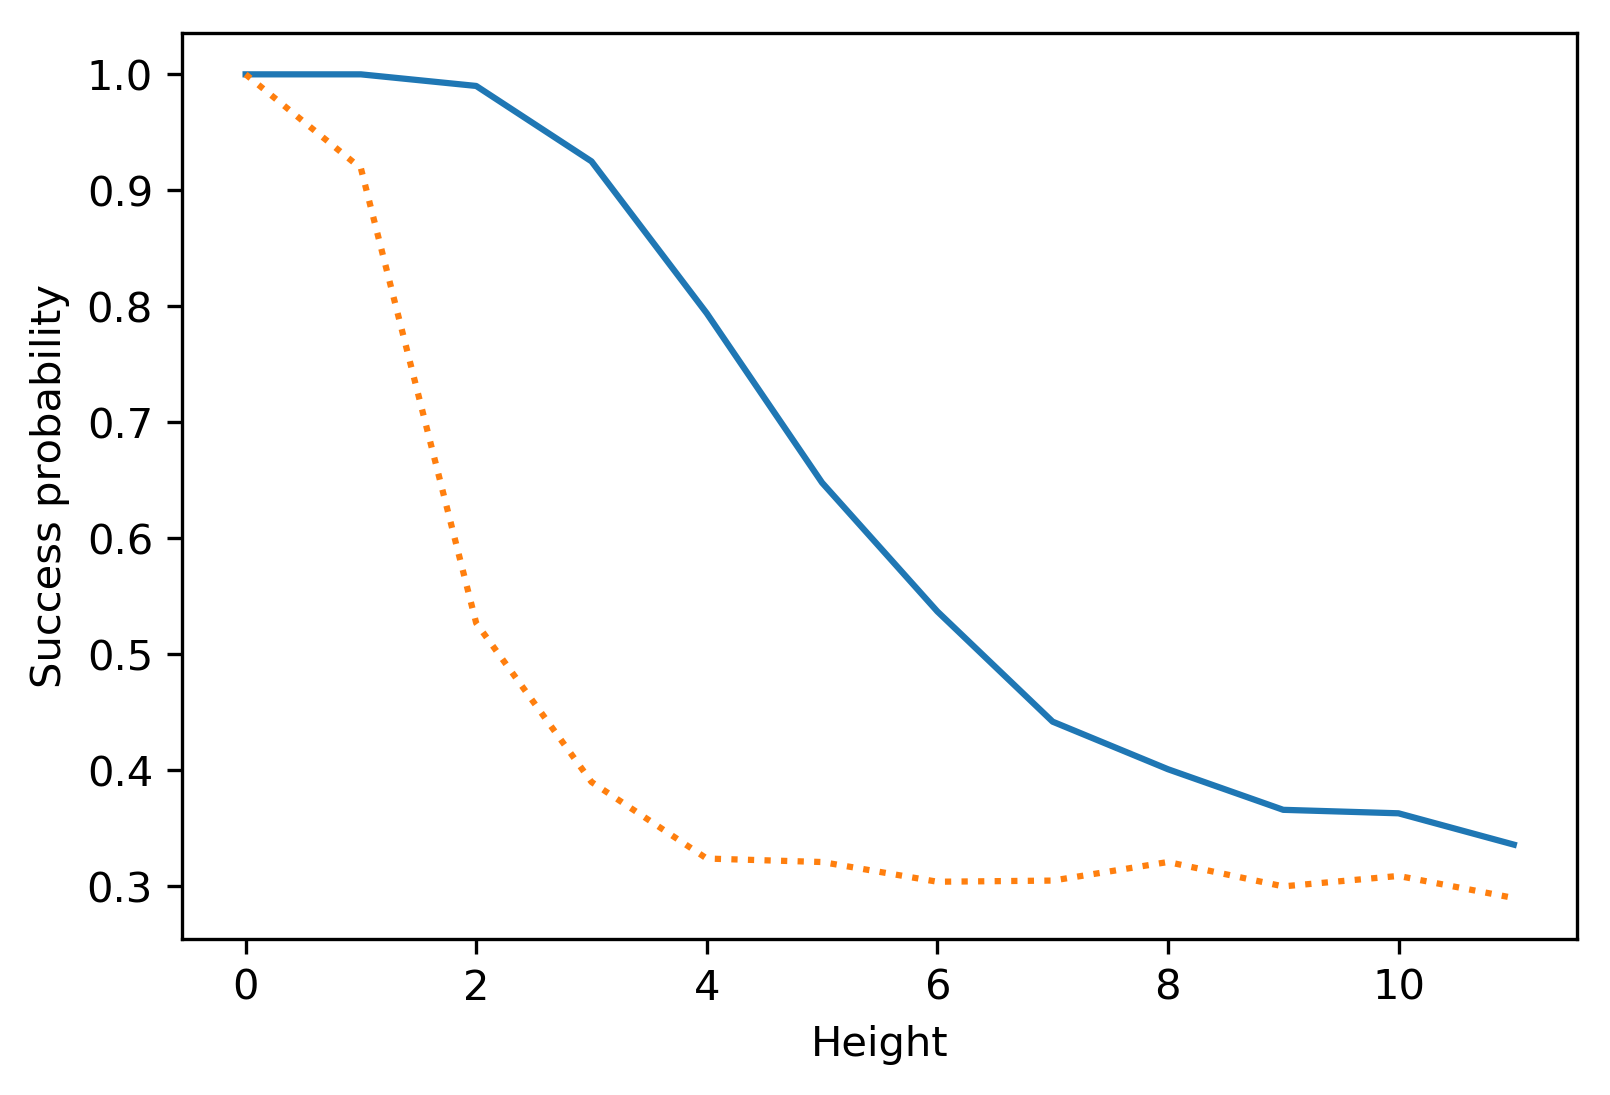

In [19]:
# EXP 13: accuracy of pairwise comparisons for deep triplet
g, f, b0, b1, h, k, N = 0.01, 5, 0.1, 0.3, 12, 75, 1000 

freq_succ0, freq_succ1 = np.zeros(h), np.zeros(h)
for i in range(h):
    freq_succ0[i] = test_deep_naive(g,f,b0,i,k,N)
    freq_succ1[i] = test_deep_naive(g,f,b1,i,k,N)

plt.plot(np.arange(h),freq_succ0); 
plt.plot(np.arange(h),freq_succ1,':');
plt.xlabel('Height'), plt.ylabel('Success probability');

That first test was somewhat naive, in that it used a single leaf per subtree. It is not surprising that the rate of signal decay only has a mild effect on its behavior: in our observations on ancestral state reconstruction, it was crucial to use all the leaves. A more sophisticated estimator is obtained by averaging over all pairs of leaves between each pair of subtrees. Namely, we consider the following distance-based algorithm $\overline{\mathbf{D}}$: we return $\overline{\mathbf{D}}(\sigma_L^{(k)}) = XY|Z$ if 
$$
\min\left\{\sum_{i,j=1}^{2^h} \Sigma_{X_i Y_j}^k - \sum_{i,j=1}^{2^h} \Sigma_{X_i Z_j}^k;\sum_{i,j=1}^{2^h}\Sigma_{X_i Y_j}^k - \sum_{i,j=1}^{2^h} \Sigma_{Y_i Z_j}^k\right\} > 0;
$$
and we return a failure if no such pair exists. In the function `avg_dst` below, we re-write $$
\sum_{i,j=1}^{2^h} \Sigma_{X_i Y_j}^k = \sum_{m=1}^k 
\left(\sum_{i=1}^{2^h} s_{X_i X}^m\right) s_{XY}^m \left(\sum_{j=1}^{2^h} s_{Y Y_j}^m \right),
$$
and we note that the expressions in parentheses on the r.h.s. can be expressed in terms of the total number of substitutions between $X$ (respectively $Y$) and $X_1,\ldots,X_{2^h}$ (respectively $X_1,\ldots,X_{2^h}$). The latter quantities are of course not known from the data at the leaves &mdash; we only use this convenient representation for the sake of speedy simulation. The function `test_deep_avg` implements the estimator $\overline{\mathbf{D}}$ and tests it for different values of the depth $h$.


In [20]:
def avg_dst(ns2X,sXY,ns2Y,h): # mean distance across deep subtrees X and Y
    return (-ns2X+(2**h-ns2X))*sXY*(-ns2Y+(2**h-ns2Y))

def test_deep_avg(g,f,b,h,k,N): # averaged pairwise for deep triplet AB|C 
    sAB, sAC, sBC = AB_C(g,f,k,N)
    ns2A, ns2B, ns2C = full(b,k,h,N), full(b,k,h,N), full(b,k,h,N)
    critABvAC = avg_dst(ns2A,sAB,ns2B,h) - avg_dst(ns2A,sAC,ns2C,h)
    critABvBC = avg_dst(ns2A,sAB,ns2B,h) - avg_dst(ns2B,sBC,ns2C,h)
    ABvAC, ABvBC = comp(critABvAC,critABvBC)
    return np.sum(np.logical_and(ABvAC[:,-1]>0, ABvBC[:,-1]>0),axis=0)/N

The following experiment shows a drastically different outcome. In the plot, the solid line is the probability of success of $\overline{\mathbf{D}}$ when $b$ is below the critical threshold (here `b0=0.1`) while the dotted line shows the same quantity above the threshold (here `b1=0.3`). Below the threshold, the probability of success remains $1$ no matter how deep the tree is (here up to `h=12`). On the other hand, above the threshold the success deteriotates fast with $h$. Morally, in the first case, the phylogeny appears "shallow" (information-theoretically speaking) independently of its true depth (combinatorially speaking). The sequence length was chosen so that, in both cases, the success probability is $1$ when $h=0$ (trial and error not shown). Also `g` and `f` were chosen to ensure that somewhat short sequences suffice, to allow for a fast simulation.

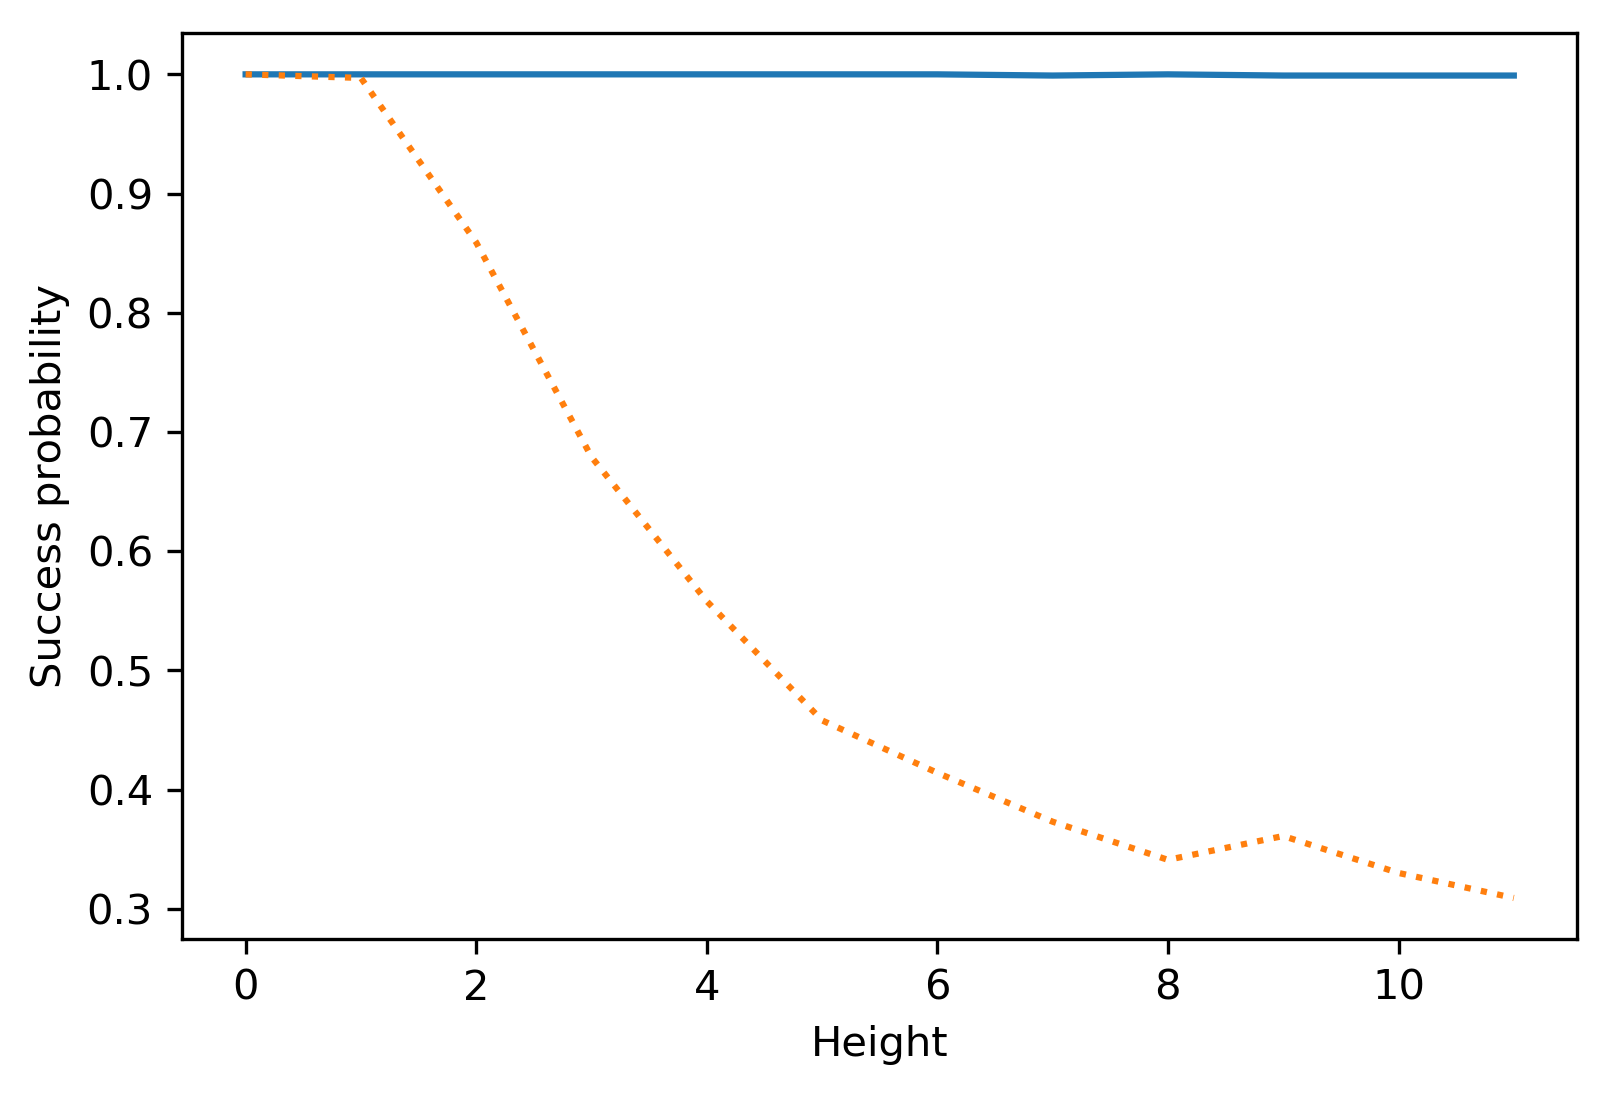

In [21]:
# EXP 14: accuracy of averaged pairwise comparisons for deep triplet
g, f, b0, b1, h, k, N = 0.01, 5, 0.1, 0.3, 12, 75, 1000 

freq_succ0, freq_succ1 = np.zeros(h), np.zeros(h)
for i in range(h):
    freq_succ0[i] = test_deep_avg(g,f,b0,i,k,N)
    freq_succ1[i] = test_deep_avg(g,f,b1,i,k,N)

plt.plot(np.arange(h),freq_succ0);
plt.plot(np.arange(h),freq_succ1,':');
plt.xlabel('Height'), plt.ylabel('Success probability');

We confirm this picture analytically. We assume the data is generated under $AB|C$. We want an upper bound on the probability of error, i.e., the probability of the intersection of the events
$$
\mathcal{E}_{AC} = \left\{\sum_{i,j=1}^{2^h} \Sigma_{A_i B_j}^k - \sum_{i,j=1}^{2^h} \Sigma_{A_i C_j}^k > 0\right\},
$$
and
$$
\mathcal{E}_{BC} = \left\{\sum_{i,j=1}^{2^h} \Sigma_{A_i B_j}^k - \sum_{i,j=1}^{2^h} \Sigma_{B_i C_j}^k > 0\right\}.
$$
By symmetry, these have the same probability. We follow the argument used in the analysis of $\mathbf{D}$, with one modification. Rather than using Hoeffding's inequality (which is valid for bounded variables &mdash; not the case here) we use Chebyshev's inequality, one form of which is the following: if $W_1,\ldots,W_k$ are independent random variables with respective variances $\alpha_i$, $i = 1,\ldots,k$, then for all $\epsilon > 0$
$$
\mathbb{P}\left[\sum_{i=1}^k (W_i - \mathbb{E}[W_i]) \geq k \epsilon\right]
\leq \frac{\sum_{i=1}^k \alpha_i}{k^2 \epsilon^2}.
$$

Hence, using the expression for $\sum_{i,j=1}^{2^h} \Sigma_{A_i B_j}^k$ derived above, it remains to compute the mean and variance of $\left(\sum_{i=1}^{2^h} s_{A_i A}^m\right) s_{AB}^m \left(\sum_{j=1}^{2^h} s_{B B_j}^m \right)$. By definition, $s_{XY}^m = \sigma_X^m \sigma_Y^m$ so that by cancellation
$$
\widetilde{\Sigma}_{AB}^m
:= \left(\sum_{i=1}^{2^h} s_{A_i A}^m\right) s_{AB}^m \left(\sum_{j=1}^{2^h} s_{B B_j}^m \right)
= \left(\sum_{i=1}^{2^h} \sigma_{A_i}^m\right) \left(\sum_{j=1}^{2^h} \sigma_{B_j}^m \right).
$$
The law of total expectation allows to condition on the states at $A$ and $B$ as follows
$$
\mathbb{E}\left[\left(\sum_{i=1}^{2^h} \sigma_{A_i}^m\right) \left(\sum_{j=1}^{2^h} \sigma_{B_j}^m \right)\right]
= \mathbb{E}\left[\mathbb{E}\left[\left(\sum_{i=1}^{2^h} \sigma_{A_i}^m\right) \left(\sum_{j=1}^{2^h} \sigma_{B_j}^m \right)\middle|\sigma_A^m, \sigma_B^m\right]\right].
$$
This is useful because, once we condition on $\sigma_A^m$ and $\sigma_B^m$, the states at leaves of $T_A$ and $T_B$ are independent. This is the so-called Markov property. Hence we get 
$$
\mathbb{E}\left[\mathbb{E}\left[\left(\sum_{i=1}^{2^h} \sigma_{A_i}^m\right) \left(\sum_{j=1}^{2^h} \sigma_{B_j}^m \right)\middle|\sigma_A^m, \sigma_B^m\right]\right]
= \mathbb{E}\left[\mathbb{E}\left[\sum_{i=1}^{2^h} \sigma_{A_i}^m\middle|\sigma_A^m\right]\mathbb{E}\left[\sum_{j=1}^{2^h} \sigma_{B_j}^m \middle|\sigma_B^m\right]\right].
$$
Using our previous formula for the conditional expectations above, we get finally
$$
\mathbb{E}\left[\mathbb{E}\left[\sum_{i=1}^{2^h} \sigma_{A_i}^m\middle|\sigma_A^m\right]\mathbb{E}\left[\sum_{j=1}^{2^h} \sigma_{B_j}^m \middle|\sigma_B^m\right]\right]
= \mathbb{E}\left[2^h \theta(b)^h \sigma_A^m \times 2^h \theta(b)^h \sigma_{B}^m\right]
= (2\theta(b))^{2h} \theta(2g).
$$
That is,
$$
\mathbb{E}\left[\widetilde{\Sigma}_{AB}^m\right] = (2\theta(b))^{2h} \theta(2g).
$$

As for the variance, we first use the conditional variance formula
$$
\mathrm{Var}\left[\widetilde{\Sigma}_{AB}^m\right]
= \mathrm{Var}\left[\mathbb{E}\left[\widetilde{\Sigma}_{AB}^m\middle|\sigma_A^m, \sigma_B^m\right]\right]
+ \mathbb{E}\left[\mathrm{Var}\left[\widetilde{\Sigma}_{AB}^m\middle|\sigma_A^m, \sigma_B^m\right]\right].
$$
From the computation above, the first term is
$$
\mathrm{Var}\left[\mathbb{E}\left[\widetilde{\Sigma}_{AB}^m\middle|\sigma_A^m, \sigma_B^m\right]\right]
= \mathrm{Var}\left[2^h \theta(b)^h \sigma_A^m \times 2^h \theta(b)^h \sigma_{B}^m\right]
= (2\theta(b))^{4h}\mathrm{Var}\left[\sigma_A^m \sigma_{B}^m\right].
$$
Using that $(\sigma_A^m)^2 = (\sigma_B^m)^2 = 1$,
$$
\mathrm{Var}\left[\sigma_A^m \sigma_{B}^m\right]
= 1 - \left(\mathbb{E}\left[\sigma_A^m \sigma_{B}^m\right]\right)^2
= 1 - \theta(2g)^2.
$$
For the second term in the conditional variance formula, we use that
$$
\mathrm{Var}\left[\widetilde{\Sigma}_{AB}^m\middle|\sigma_A^m, \sigma_B^m\right]
= \mathbb{E}\left[\left(\widetilde{\Sigma}_{AB}^m\right)^2\middle|\sigma_A^m, \sigma_B^m\right] - \left(\mathbb{E}\left[\widetilde{\Sigma}_{AB}^m\middle|\sigma_A^m, \sigma_B^m\right]\right)^2.
$$
The second term on the r.h.s. is equal to $(2\theta(b))^{4h}$ while the first term is, by the Markov property again,
$$
\mathbb{E}\left[\left(\sum_{i=1}^{2^h} \sigma_{A_i}^m\right)^2\middle|\sigma_A^m\right]\mathbb{E}\left[\left(\sum_{j=1}^{2^h} \sigma_{B_j}^m\right)^2\middle|\sigma_B^m\right]
= \left(\frac{1}{4}\sum_{m=0}^{h} 2^{2h-m} \theta(b)^{2h-2m}\right)^2,
$$
where the last expression was derived in the section on ancestral state reconstruction. Note that both terms in our derived expression for $\mathrm{Var}\left[\widetilde{\Sigma}_{AB}^m\middle|\sigma_A^m, \sigma_B^m\right]$ do not in fact depend on $\sigma_A^m, \sigma_B^m$ and therefore are unaffected by taking an expectation. Putting everything together, the variance is
$$
\mathrm{Var}\left[\widetilde{\Sigma}_{AB}^m\right]
= (2\theta(b))^{4h}\left(1 - \theta(2g)^2\right)
+ \left(\frac{1}{4}\sum_{m=0}^{h} 2^{2h-m} \theta(b)^{2h-2m}\right)^2 - (2\theta(b))^{4h}.
$$
After simplification that becomes
$$
\mathrm{Var}\left[\widetilde{\Sigma}_{AB}^m\right]
= \left(\frac{1}{4}\sum_{m=0}^{h} 2^{2h-m} \theta(b)^{2h-2m}\right)^2 
-(2\theta(b))^{4h}\theta(2g)^2.
$$

We will bound $\mathbb{P}[\mathcal{E}_{AC}^c]$ as follows:
$$
\mathbb{P}[\mathcal{E}_{AC}^c] 
\leq \mathbb{P}[\mathcal{F}_{AB}] + \mathbb{P}[\mathcal{F}_{AC}], 
$$
where
$$
\mathcal{F}_{AB}
= \left\{\sum_{m=1}^k\left(\widetilde{\Sigma}_{AB}^m-\mathbb{E}[\widetilde{\Sigma}_{AB}^m]\right) \leq - k (2\theta(b))^{2h} \frac{\theta(2g)-\theta(2g+2f)}{2}\right\},
$$
and
$$
\mathcal{F}_{AC}
= \left\{\sum_{m=1}^k\left(\widetilde{\Sigma}_{AC}^m-\mathbb{E}[\widetilde{\Sigma}_{AC}^m]\right) \geq k (2\theta(b))^{2h} \frac{\theta(2g)-\theta(2g+2f)}{2}\right\}.
$$
In words, if $\sum_{i,j=1}^{2^h} \Sigma_{A_i B_j}^k - \sum_{i,j=1}^{2^h} \Sigma_{A_i C_j}^k \leq 0$ then one of the two terms must be away from its expectation by more than half the gap between the expectations. By Chebyshev's inequality we have the bound
$$
\mathbb{P}[\mathcal{F}_{AB}]
\leq \frac{\left(\frac{1}{4}\sum_{m=0}^{h} 2^{2h-m} \theta(b)^{2h-2m}\right)^2 
-(2\theta(b))^{4h}\theta(2g)^2}{k (2\theta(b))^{4h} (\theta(2g)-\theta(2g+2f))^2/4}.
$$
After simplification, we get
$$
\mathbb{P}[\mathcal{F}_{AB}]
\leq \frac{1}{k}\frac{\frac{1}{4}\left(\sum_{m=0}^{h} (2\theta(b)^{2})^{-m} \right)^2}{(\theta(2g)-\theta(2g+2f))^2}.
$$
It can be checked that the same bound holds for $\mathbb{P}[\mathcal{F}_{AC}]$. Applying the same argument to $\mathbb{P}[\mathcal{E}_{BC}^c]$, we finally get the following bound
$$
\mathbb{P}\left[\overline{\mathbf{D}}(\sigma_L^{(k)}) \neq T\right]
\leq \frac{1}{k}\frac{\left(\sum_{m=0}^{h} (2\theta(b)^{2})^{-m} \right)^2}{(\theta(2g)-\theta(2g+2f))^2}.
$$

The sequence length required to drive down this error to $\delta$ depends on $2 \theta(b)^2$. When $2\theta(b)^2 > 1$, the numerator on the r.h.s. is at most $1/(1-(2\theta(b)^2)^{-1})^2$ and we require
$$
k \geq \frac{1}{\delta}\frac{1}{(\theta(2g)-\theta(2g+2f))^2(1-(2\theta(b)^2)^{-1})^2},
$$
which does not depend on $h$. That is, in that regime, the sequence length requirement of this method is not sensitive to the depth of the tree. On the other hand, when $2\theta(b)^2 < 1$ (we omit the equality case), the numerator on the r.h.s. of our bound on the error probability now grows exponentially with $h$ and we require
$$
k \geq \frac{1}{\delta} \frac{(1/2\theta(b)^2)^{2h+2}}{(\theta(2g)-\theta(2g+2f))^2 ((1/2\theta(b)^2)-1)^2}.
$$

# Bibliographic remarks

While for simplicity we have focused exclusively on the Cavender-Farris model under a molecular clock, sequence-length requirement results have been derived in much more general contexts &mdash; using some of the insights described here as well as many other ideas. We give a brief, non-extensive review of these results below.

Under a general Markov model on a general phylogeny with branch lengths bounded between two constants, distance-based methods have been developed that have the same type of dependence on shortest branch length and depth that we previoulsy described, although branch length and depth must be defined with some care <a href="https://doi.org/10.1002/(SICI)1098-2418(199903)14:2%3C153::AID-RSA3%3E3.0.CO;2-R">[1]</a>, <a href="https://doi.org/10.1016/S0304-3975(99)00028-6">[2]</a>, <a href="https://doi.org/10.1089/106652799318337">[3]</a>, <a href="https://doi.org/10.1214/105051606000000024">[4]</a>. In particular, the sequence-length requirement of these so-called fast converging methods is polynomial in the number of leaves $n$ under these assumptions. It should be noted that not all distance-based methods are fast converging. Most prominently, the popular Neighbor-Joining has been shown to have exponential requirement in $n$ <a href="https://doi.org/10.1016/j.mbs.2005.11.003">[5]</a>. Results on fast converging distance-based methods have also been extended to partial forest reconstruction <a href="https://doi.org/10.1109/TCBB.2007.1010">[6]</a>, <a href="https://doi.org/10.1137/09075576X">[7]</a>, <a href="https://doi.org/10.1007/11732990_24">[8]</a>.

Phase transition results on general phylogenies have also been obtained, albeit under more restrictive assumptions. In the "reconstruction regime," i.e., when branch lengths are below a critical threshold that depends on the model, the sequence-length requirement has been shown to scale logarithmically in $n$ for certain ad-hoc methods <a href="https://doi.org/10.1090/S0002-9947-03-03382-8">[9]</a>, <a href="https://doi.org/10.1007/s00440-009-0246-2">[10]</a>, <a href="https://doi.org/10.1007/s00453-012-9644-4">[11]</a>, as well as distance-based methods similar to the one described above <a href="https://doi.org/10.1126/science.1182300">[12]</a> and maximum likelihood estimation <a href="https://doi.org/10.1007/s00440-017-0793-x">[13]</a>.
Currently, these results have been rigorously established under simpler models, such as Jukes-Cantor, and further require that branch lengths are discretized. It is a (potentially difficult) open problem to obtain logarithmic in $n$ sequence-length requirements without this discretization assumption. Lower bounds have been derived in <a href="https://doi.org/10.1137/S089548010138790X">[14]</a>, <a href="https://doi.org/10.1089/106652703322539015">[15]</a>, <a href="https://doi.org/10.1007/s11538-010-9584-6">[16]</a>.

Some limited amount of work has been dedicated to deriving sequence-length requirements in more complex models, including models of insertions and deletions <a href="https://doi.org/10.1214/12-AAP852">[17]</a> and multiloci coalescent-based models <a href="https://doi.org/10.1214/16-AAP1273">[18]</a>, <a href="https://doi.org/10.1093/sysbio/syv016">[19]</a>.

